# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**Group 11**}, confirm - by submitting this document - that the solutions in this notebook are a result of oor own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from functools import reduce
import pickle
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 13

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [57]:
pd.set_option('max_rows', None) # Display max rows and not a truncated version
pd.set_option('max_columns', None) # Display max columns and not a truncated version
# Use pandas read_csv method to load data
df = pd.read_csv('df_train.csv')
# Data contains an unnamed column which is also like an index
df.drop(columns =['Unnamed: 0'], inplace=True)
print(df.shape)
df.head()

(8763, 48)


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


**About The Data**
The datastet comprises of 49 columns and 8763 rows of data collected across five states in spain. The dataset has both numerical and categorical features.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Firstly, we would check for missing values and duplicated values in the dataset.

In [3]:
# Use pandas dataframe info() method to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

From the resilts above, we can see that the dataframe has 48 columns, out of which only one 'Valencia_pressure' contains about 2068 missing values.
Out of the 48 columns 3 are categorical and the remaining are numerical of type float.
The categorical columns are;

1. time

2. Valencia_wind_degree

3. Seville_Pressure

Next we check for Duplicates

In [4]:
## Use pandas .duplicated method to check for duplicates rows  using the time column as the yard stick
df.duplicated(subset =['time']).any().sum()

# From the result there are no duplicated time stamps hence all results collected are unique to the time it was collected

0

From first glance at the dataset, we can see that our data contains variables that define the weather characteristics of five states which amounts to a total number of 48 features. For ease of analysis and display of variable plots on a scatter plot and subsequently on a heatmap, we would separate each state and store it into a variable performing analysis on a state and it's relationship to the loadshortfall_3h

In [5]:
# Separate Each state and store as a variable using the state's name as the varible name
madrid = df[[col for col in df if col.startswith('Madrid')] + ['load_shortfall_3h']]
seville = df[[col for col in df if col.startswith('Seville')] + ['load_shortfall_3h']]
barcelona = df[[col for col in df if col.startswith('Barcelona')] + ['load_shortfall_3h']]
valencia = df[[col for col in df if col.startswith('Valencia')] + ['load_shortfall_3h']]
bilbao = df[[col for col in df if col.startswith('Bilbao')] + ['load_shortfall_3h']]


Now lets look at the five point summary statistics of each variable, so we can have a sense of what the data looks like, We would be checking the following values;
1. The Mean

2. The Max Value

3. The Minimum Value

4. Median

5. Mode

To Check these statistics along with the Q1, Q2 and Q3 values, we would make use of the pandas dataframe describe() method



In [6]:
#look at summary statistics statistics
statistics = df.describe().T
statistics.head()

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,13.0
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.0
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.0
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,100.0
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,100.0


To make plots of the data, we first have to device a method to fill missing data points in the valencia_pressure feature.

Knowing Fully well that this is a time series Data from each each data point is well related to the data point at the previous timestep. we could opt to use the mean or median value to fill in the missing data points, but this might not be appropriate given that the mean could be very far off from the actual value. So we would be using the forward fill methos where each missing datapoint is filled with the value at the previous time step.

In [7]:
# fill valencia_pressure feature using forward fill method
valencia['Valencia_pressure'] = valencia['Valencia_pressure'].ffill()
# Confirm that the filling was succesful
valencia.isna().sum()

Valencia_wind_deg      0
Valencia_wind_speed    0
Valencia_snow_3h       0
Valencia_pressure      0
Valencia_temp_max      0
Valencia_temp          0
Valencia_humidity      0
Valencia_temp_min      0
load_shortfall_3h      0
dtype: int64

In [8]:
# plot relevant feature interactions
# Define a Function to Help Plot Values for reusability
def scatter_plot(data, row = 2, col = 5, color='blue'):
    fig, axs = plt.subplots(row,col, figsize=(14,6),)
    fig.subplots_adjust(hspace = 1.0, wspace=.4)
    axs = axs.ravel()
    plot = [col for col in data.columns if data[col].dtype == float and col != 'load_shortfall_3h']
    for index, column in enumerate(plot):
        axs[index-1].set_title("{}".format(column),fontsize=16)
        axs[index-1].scatter(x=data[column],y=data['load_shortfall_3h'],color=color,edgecolor='k')

    fig.tight_layout(pad=1)

In [66]:
def plot_categorical(column, data):
    plt.figure(figsize=(15,10))
    sns.countplot(x=column, data = data, palette = 'Set2',
                  edgecolor=sns.color_palette("dark", 3),
                  order=data[column].value_counts().index[:30])

Having Defined the Plot function, we can call it multiple times for each variable and see a scatter plot of each variable in relation to the response variable, 'load_shortfall_3h'

**Madrid**

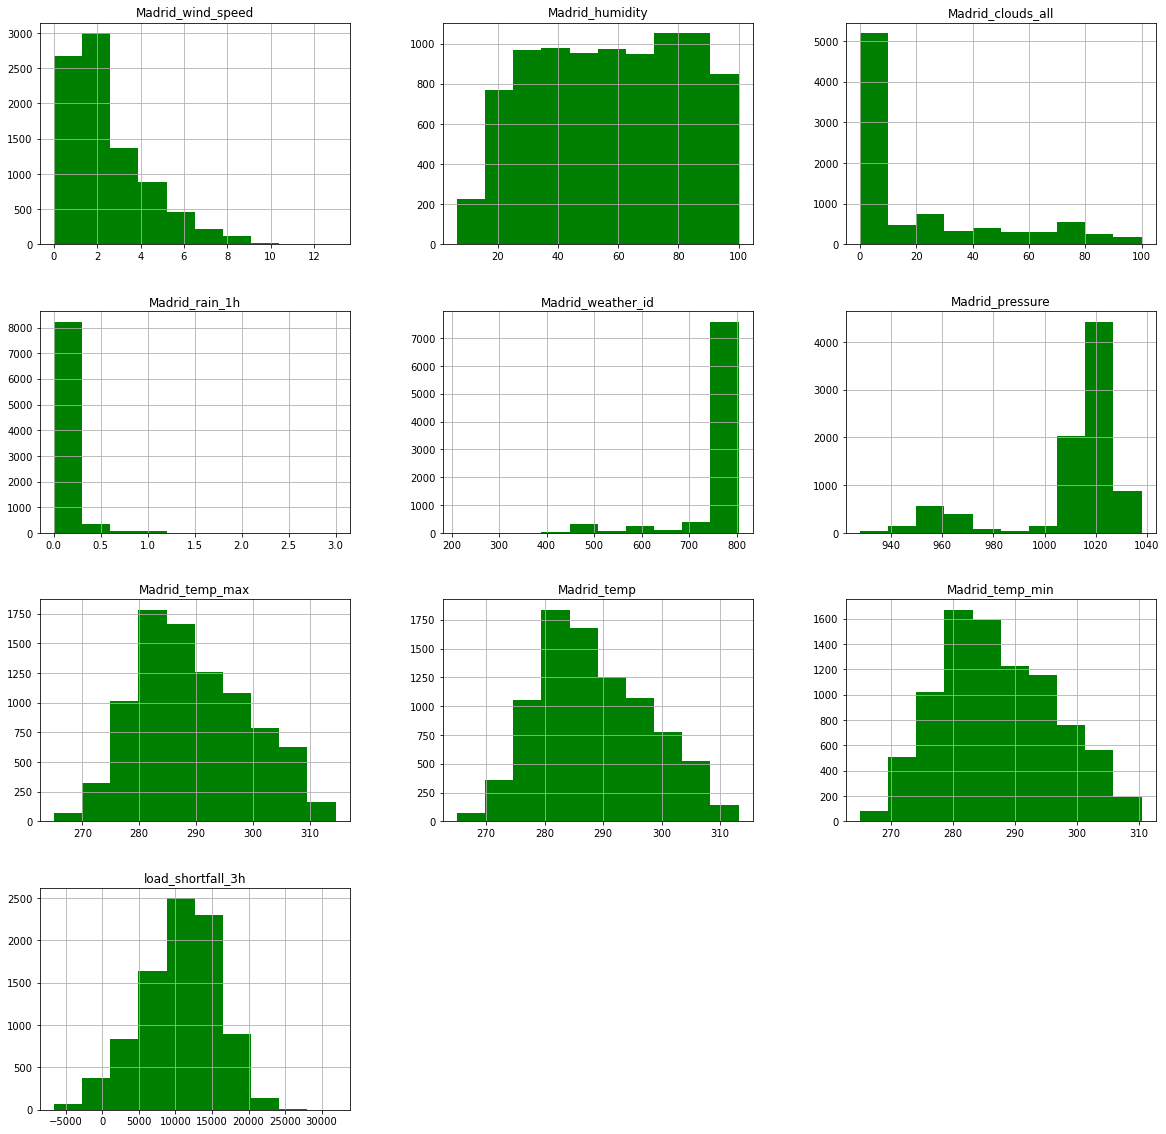

In [10]:
# have a look at feature distributions Using histogram Plots
madrid.hist(figsize=(20,20), color = 'green');

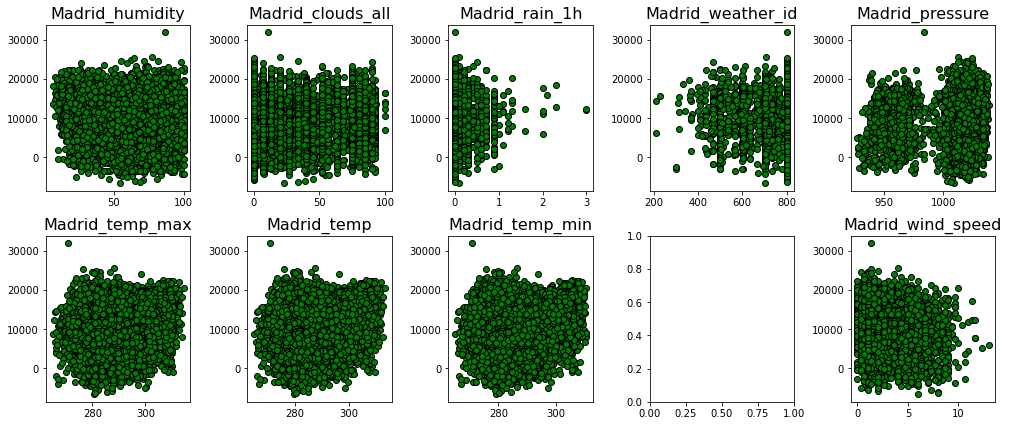

In [11]:
# Make Scatter Plots of Variables vs load_shortfall_3h
scatter_plot(madrid, color = 'green')

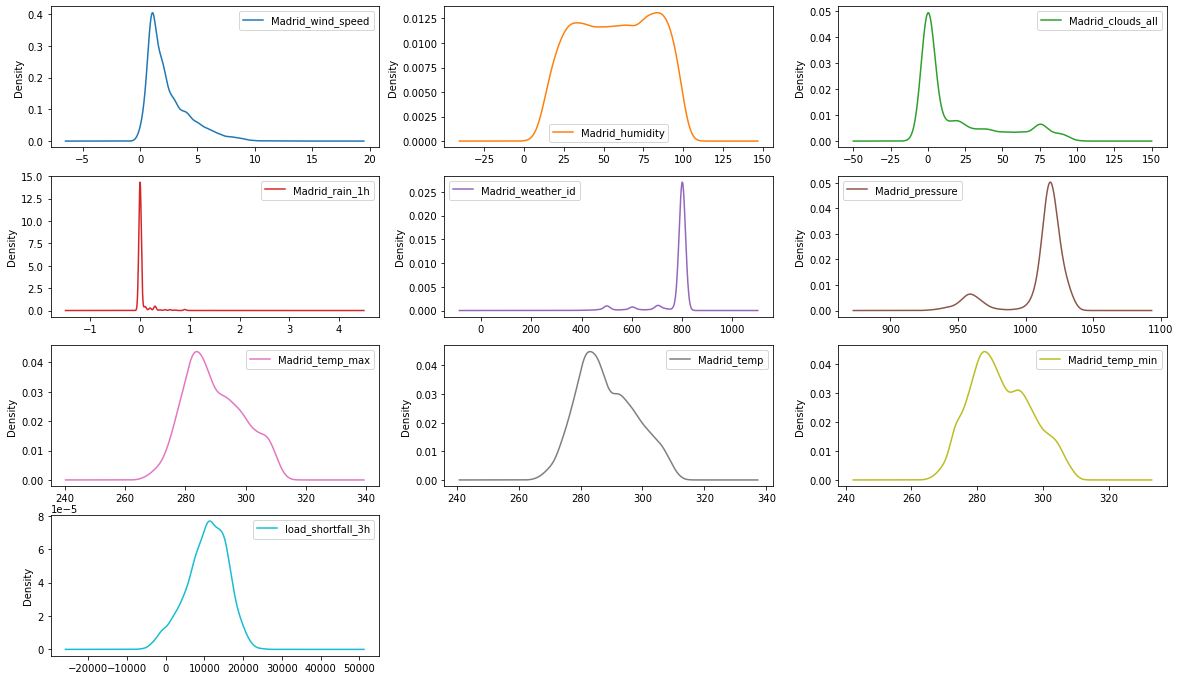

In [12]:
# have a look at feature distributions
madrid.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,40))
plt.show()

**Comments**

From visual inspection, we can see how The values for **Madrid_rain_1h**, and **Madrid_weather_id** are relatively flat across the data set, then ther was a massive spike at point 0 and point 800. we could notice the same trend in the madrid pressure_Value, although there was a slight growth at 950 before the spike occured between 1000 and 1050 

**Madrid_wind_speed** and **Madrid_clouds_all** exhibit data skewness to the right, which shows that it's values are spread more in the positive region and there is a slight spike as the data approaches zero, and then cross over to the negative portion

From the scatter plots between the predictors and the response variable, we can see that **1. Madrid_rain_1h**, **Madrid_clouds_all** and **Madrid_weather_id** do no exhibit any descernable relationship with the response variable, as their values are relatively centered around one region, however we would still perform some statistical tests to determine wich columns would be a good fit for the model building phase

Also Notice from the KDE plots how The the max and min temperatures in Madrid are basically the same as the normal temperature in Madrid as they show a similar distribution and also have similar summary statistics with a + or -1 diffrenece across rows

**The other Variables have a fairly goood distribution of data points on the scatter plot and could still undergo some transformation so they can show some relationship that can be capture by a downstream machine learning model**


**Seville**

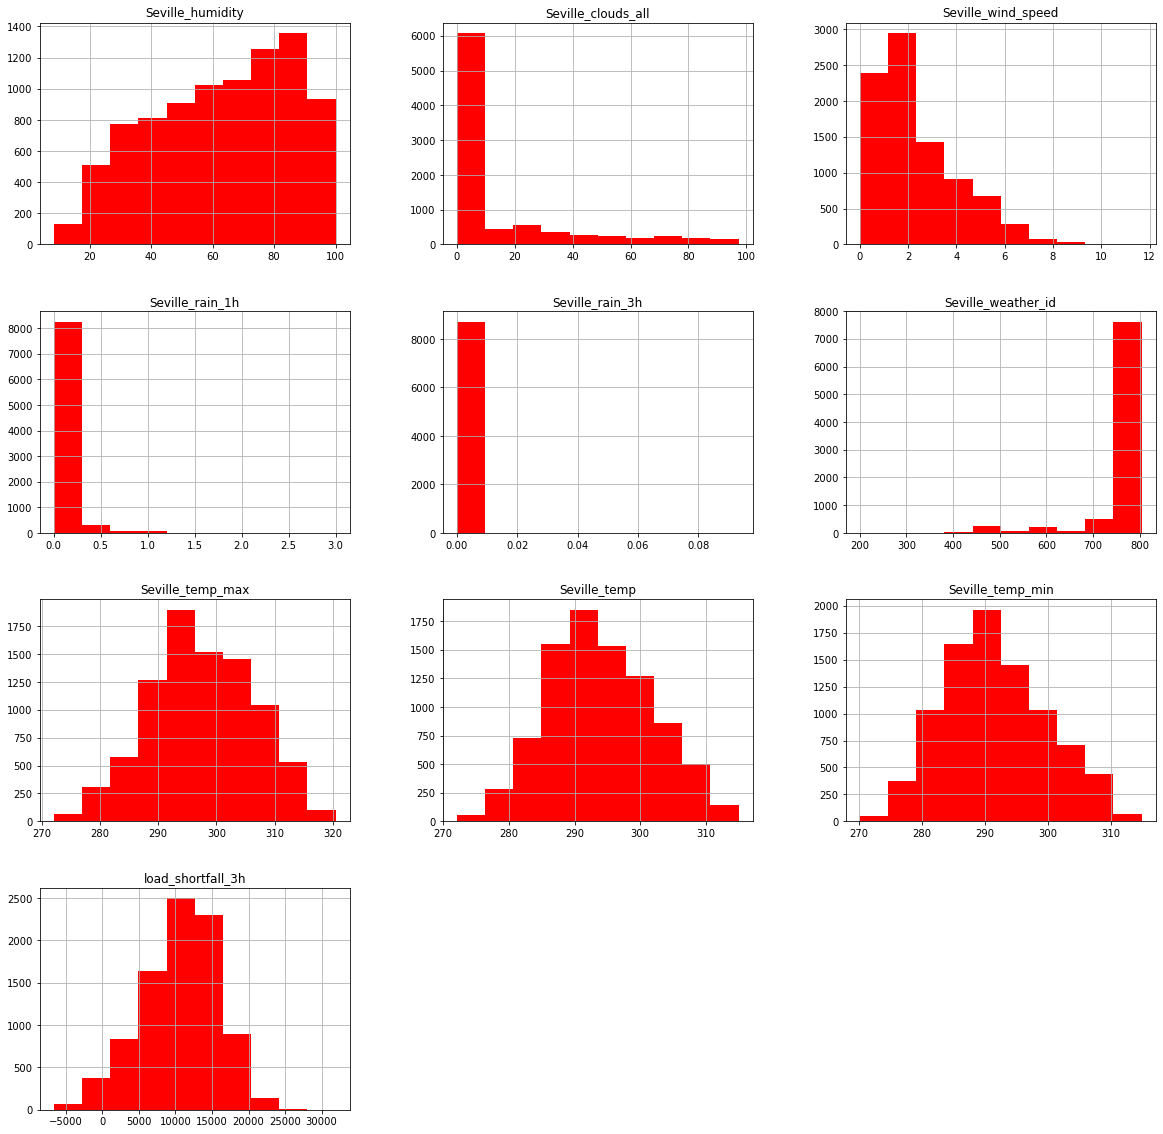

In [13]:
# have a look at feature distributions Using histogram Plots
seville.hist(figsize=(20,20), color = 'red');

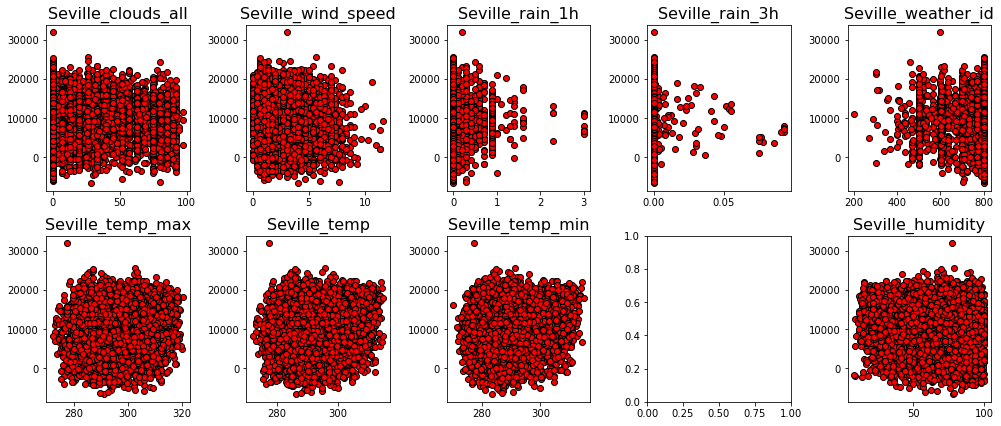

In [14]:
# Make Scatter Plots of Variables vs load_shortfall_3h
scatter_plot(seville, color = 'red')

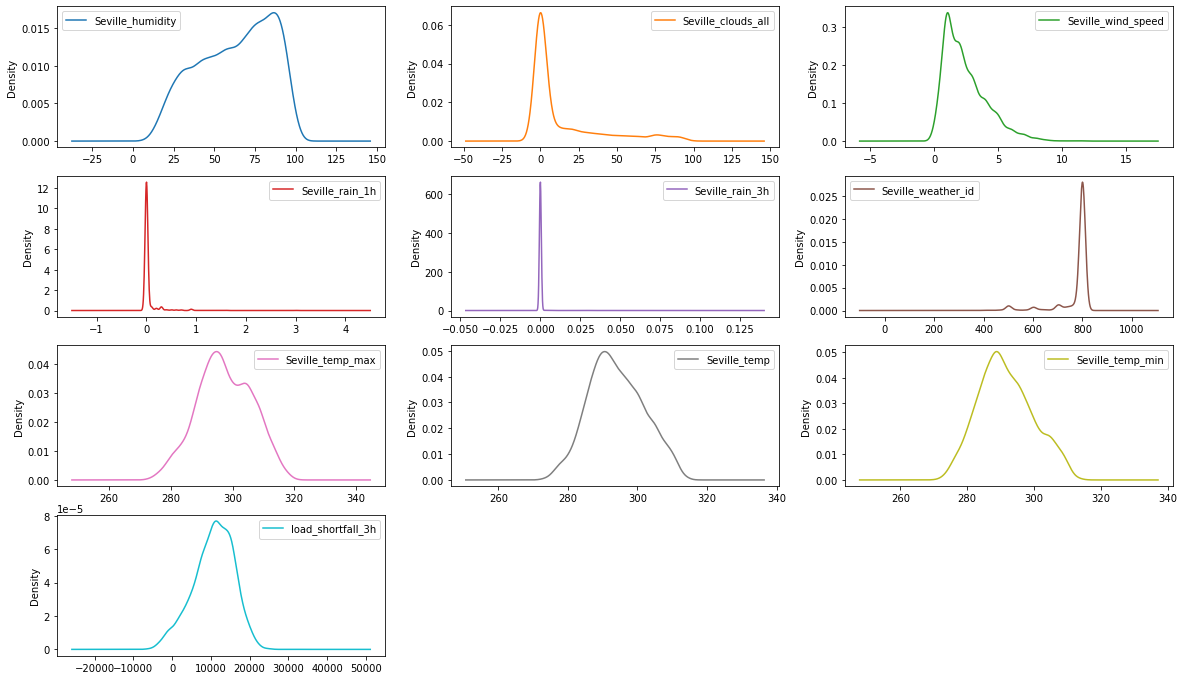

In [15]:
# have a look at feature distributions
seville.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,40))
plt.show()

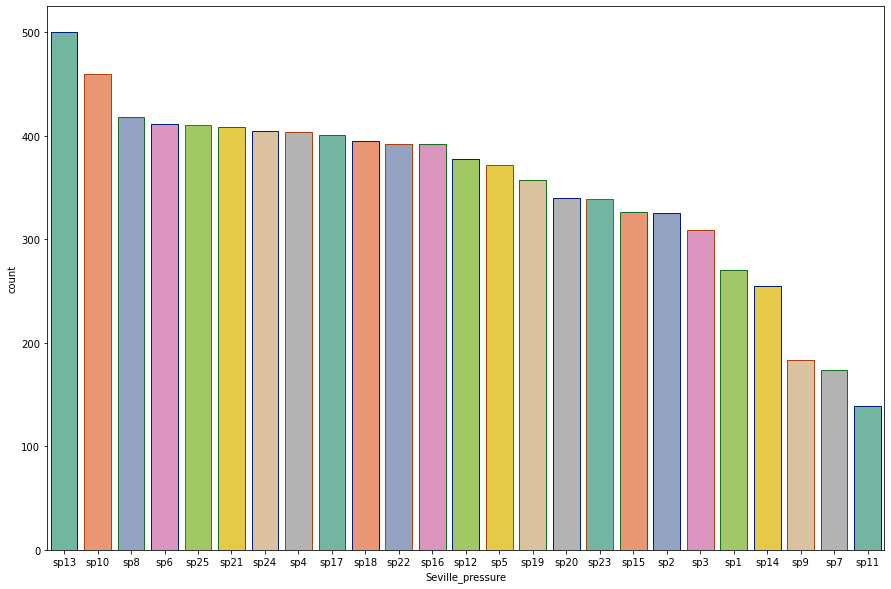

In [16]:
# Plot categroical variable to view distribution
plot_categorical('Seville_pressure', data= seville)

**Comments**

We Can Notice a somewhat similar trend in the characteristics of the weather conditions in seville in comparison to madrid.
**Seville_rain_1h**, **Seville_rain_3h** and **seville_weather_id** contains values spread across zero and then there is a sudden spike in the amount of rainfall.

Also **Seville_temp**, **Seville_temp_min** and **Seville_temp_max** all follow a normal distribution, and we can observe that their values are somewhat similar

**Seville_clouds** and **Seville_wind_speed** are highly skewed to the right, having most of their values sitting on the positive domain and few residing on the negative domain.

From the Barplots above we can see that there are about 25 categories in the valencia_pressure feature, with an ununiform spread across the data.


## Barcelona

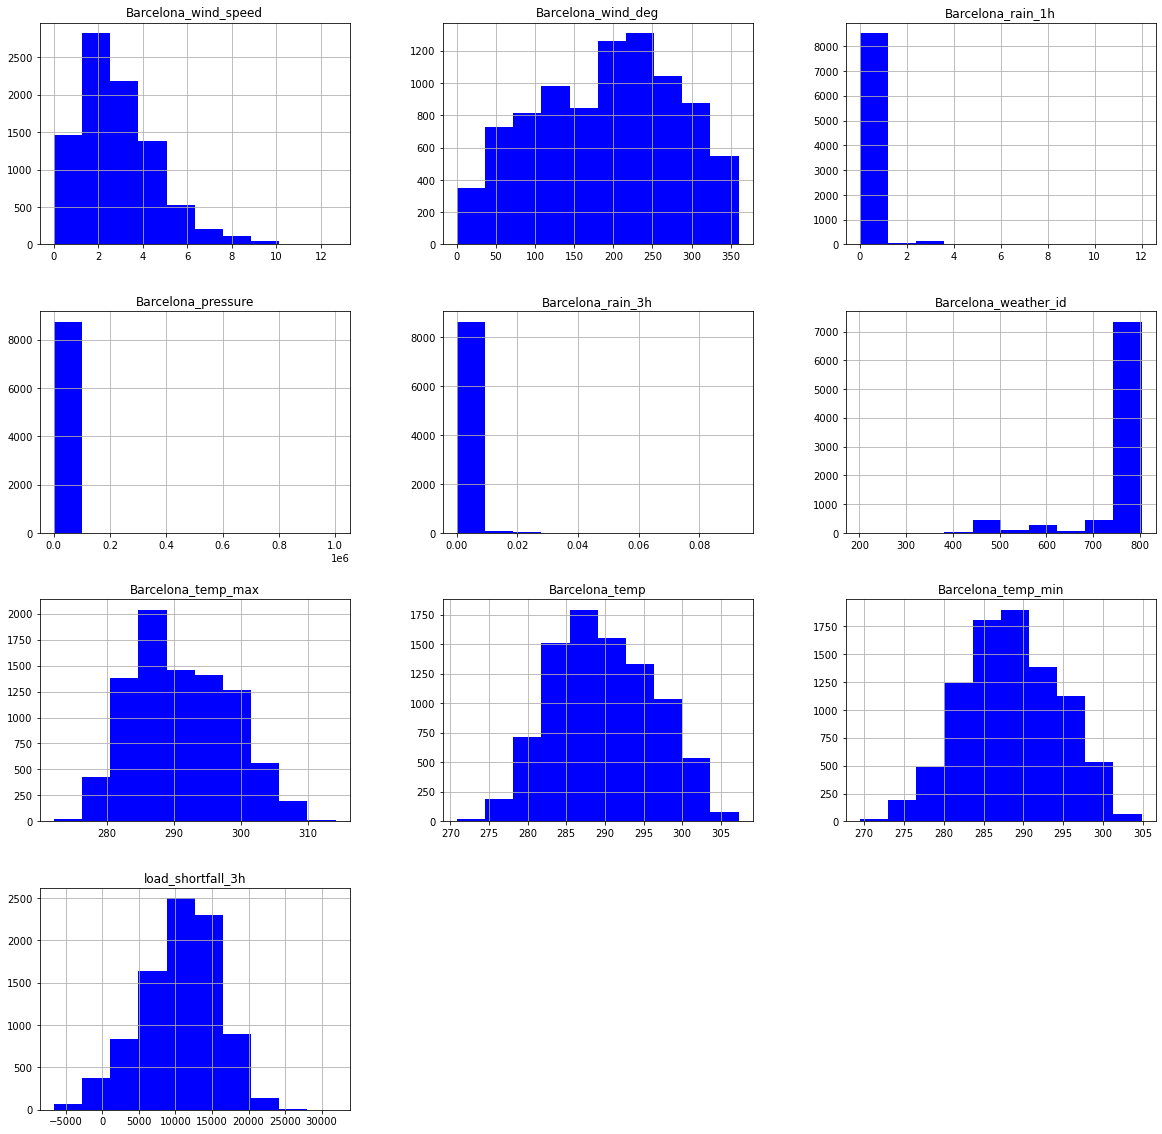

In [17]:
# have a look at feature distributions Using histogram Plots
barcelona.hist(figsize=(20,20), color = 'blue');

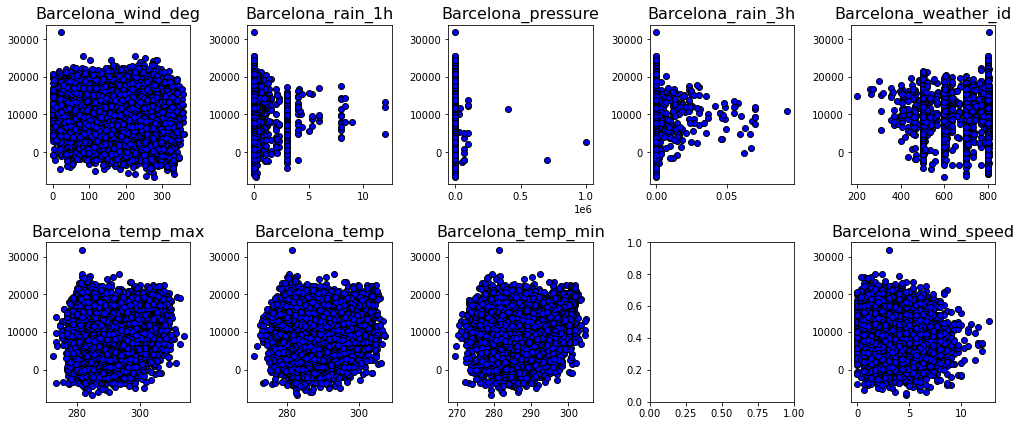

In [18]:
# Make Scatter Plots of Variables vs load_shortfall_3h
scatter_plot(barcelona, color = 'blue')

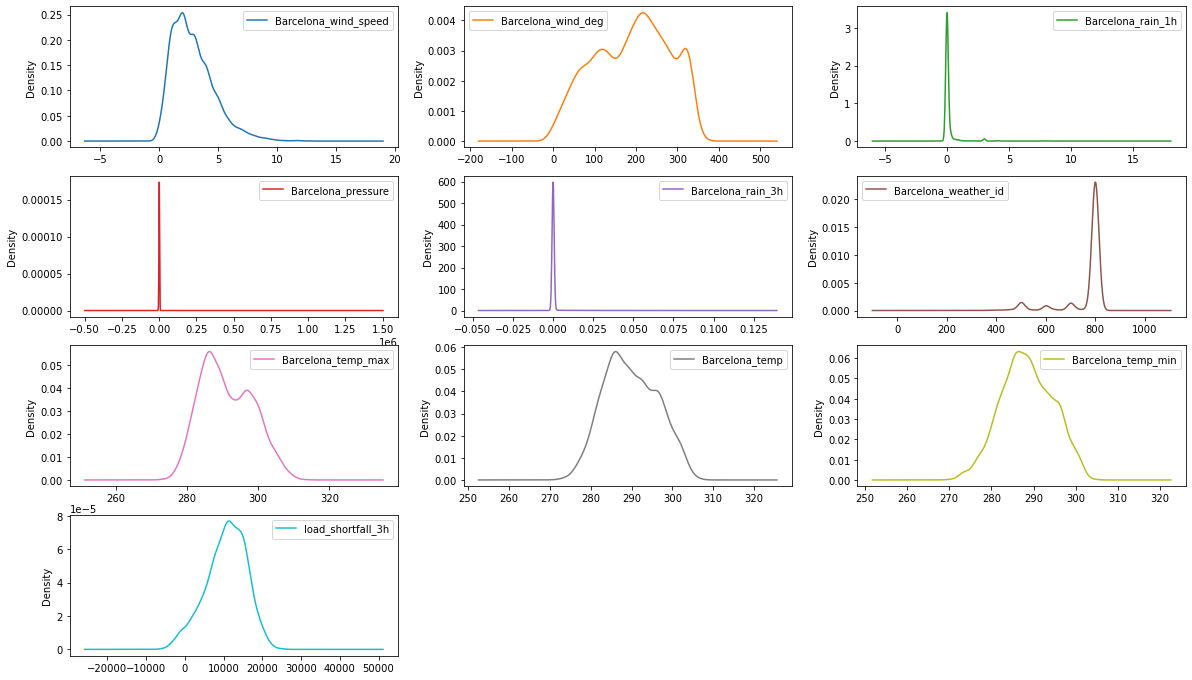

In [19]:
# have a look at feature distributions
barcelona.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,40))
plt.show()

Again, we can Notice the same trend in the values of **Barcelona_pressure**, **Barcelona_rain_3h**, **Barceloana_rain_1h** and **Barcelona_weather_id** where the values are more densely located on Zero, meaning the rain was relatively low during those time periods.

**Barcelona_wind_speed** is slightly skewed to the right, and again as before we can notice a uniformly distributed trend for the other features.

From the KDE Plots, values for **Barcelona_temp_min** and **Barcelona_temp** are very similar in distribution, although **Barcelona_temp_max** is also similar in distribution but for a slight drop in the max temp at values between 250 and 300

## Valencia

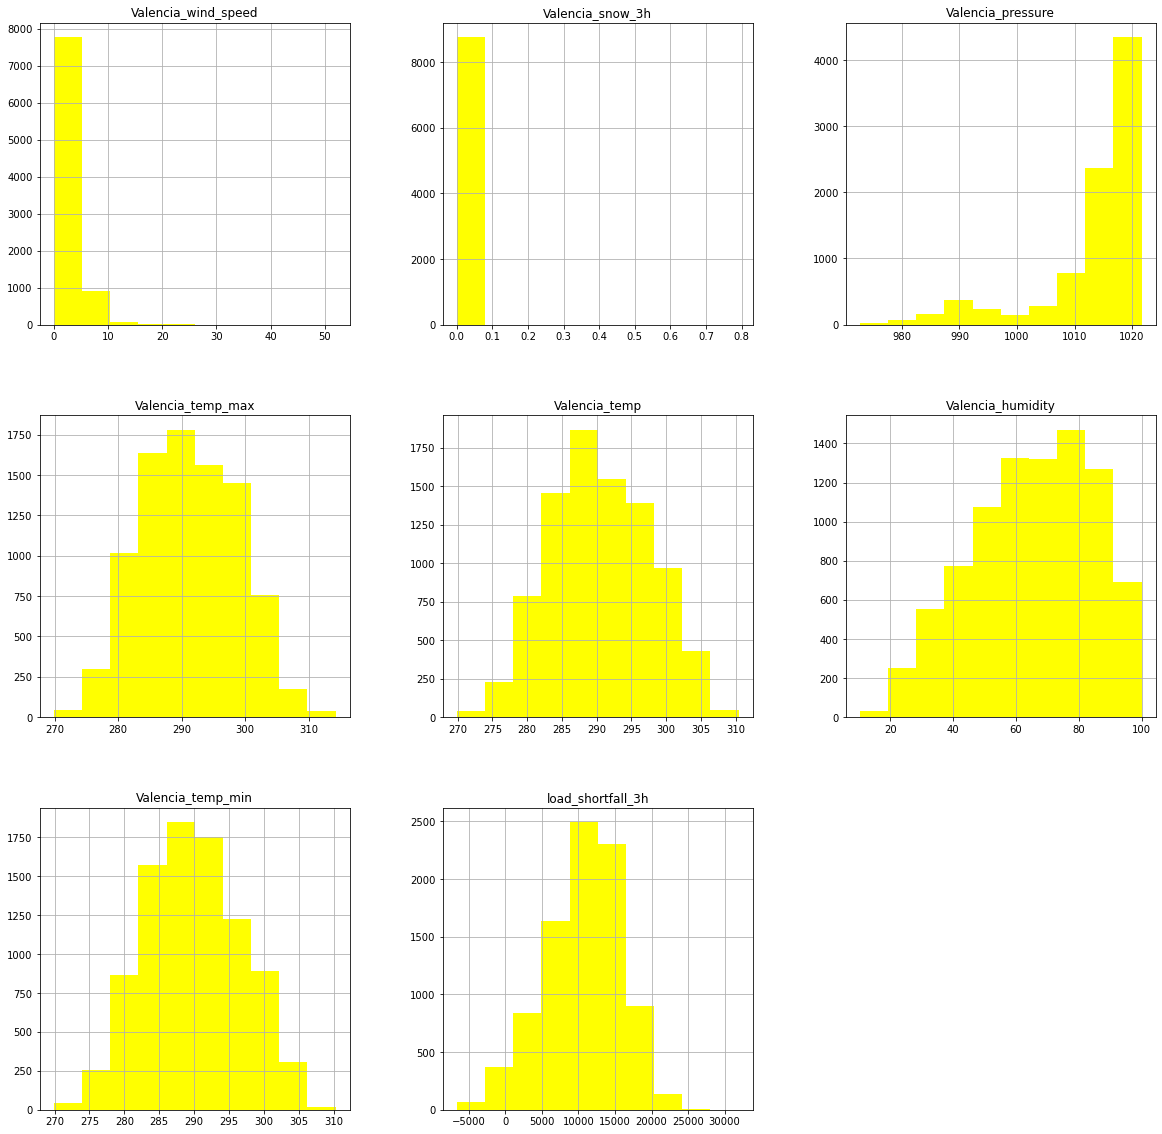

In [20]:
# have a look at feature distributions Using histogram Plots
valencia.hist(figsize=(20,20), color = 'yellow');

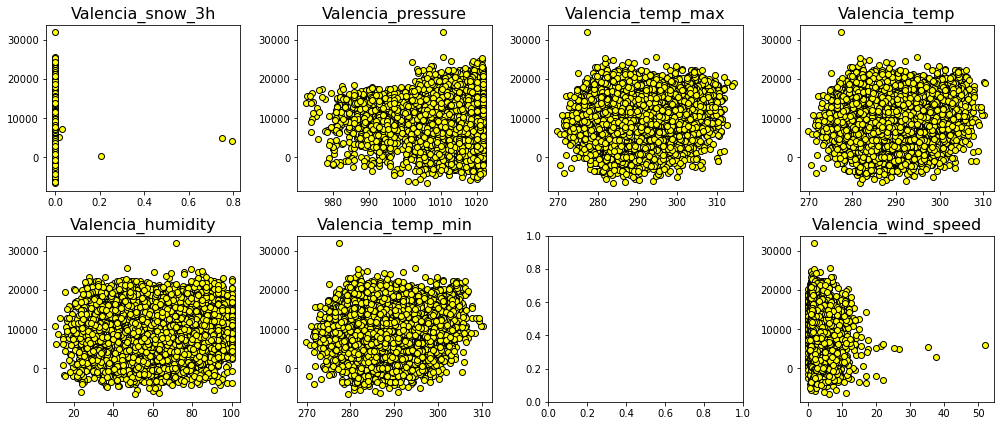

In [21]:
# Make Scatter Plots of Variables vs load_shortfall_3h
scatter_plot(valencia, color = 'yellow', col = 4)

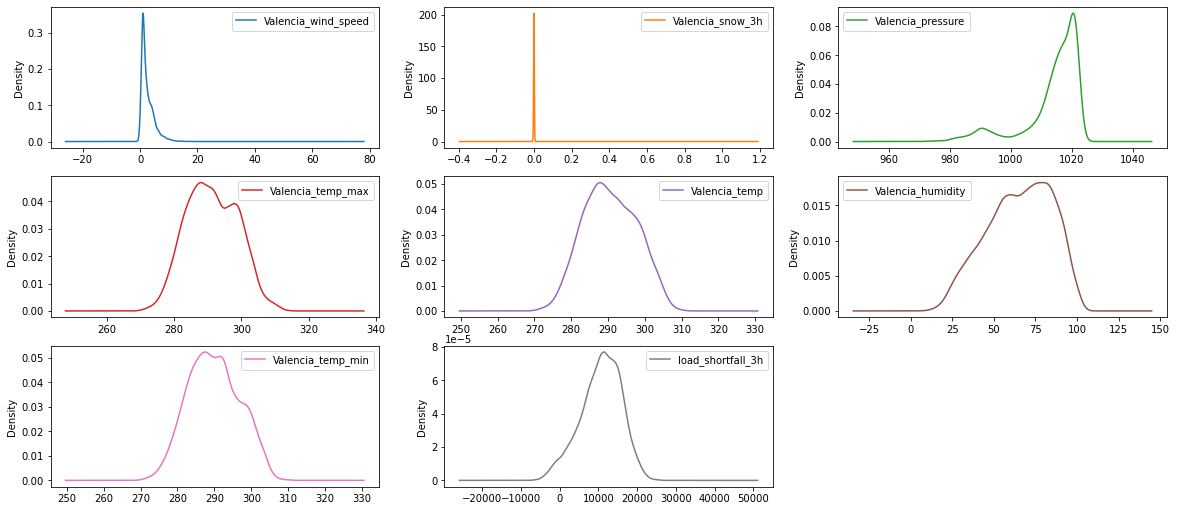

In [22]:
# have a look at feature distributions
valencia.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,40))
plt.show()

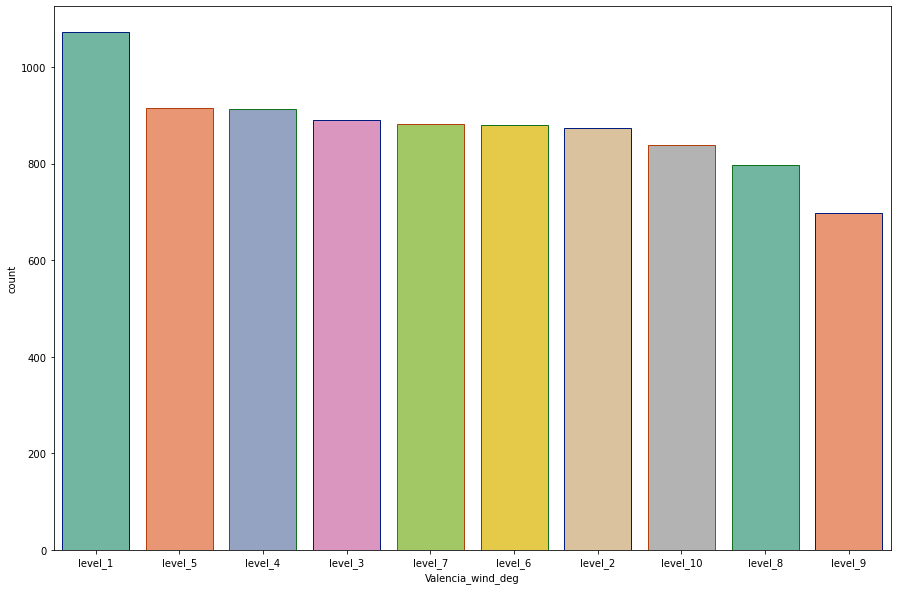

In [23]:
# Plot distribution of cateforical Variables
plot_categorical('Valencia_wind_deg', data= valencia)

**Comments**

**Valencia_wind_speed** and **Valencia_snow** have their values centred around a point and relatively have no values in the other regions, but this characteristics is seen more in valencia snow which is very intuitive because snow falls only for a specific period of the yearly carlendar period.

**Valencia_pressure** and **Valencia_wind_speed** are skewed to the left and right respectively.

**Valencia_temp, Valencia_temp_max, Valencia_temp_min and Valencia_hummidity** all show a uniform distribution of values from the **KDE Plot** 

From the bar plots for **Valencia_wind_deg** we can see that there are 9 categories, which are slightly th


## Bilbao

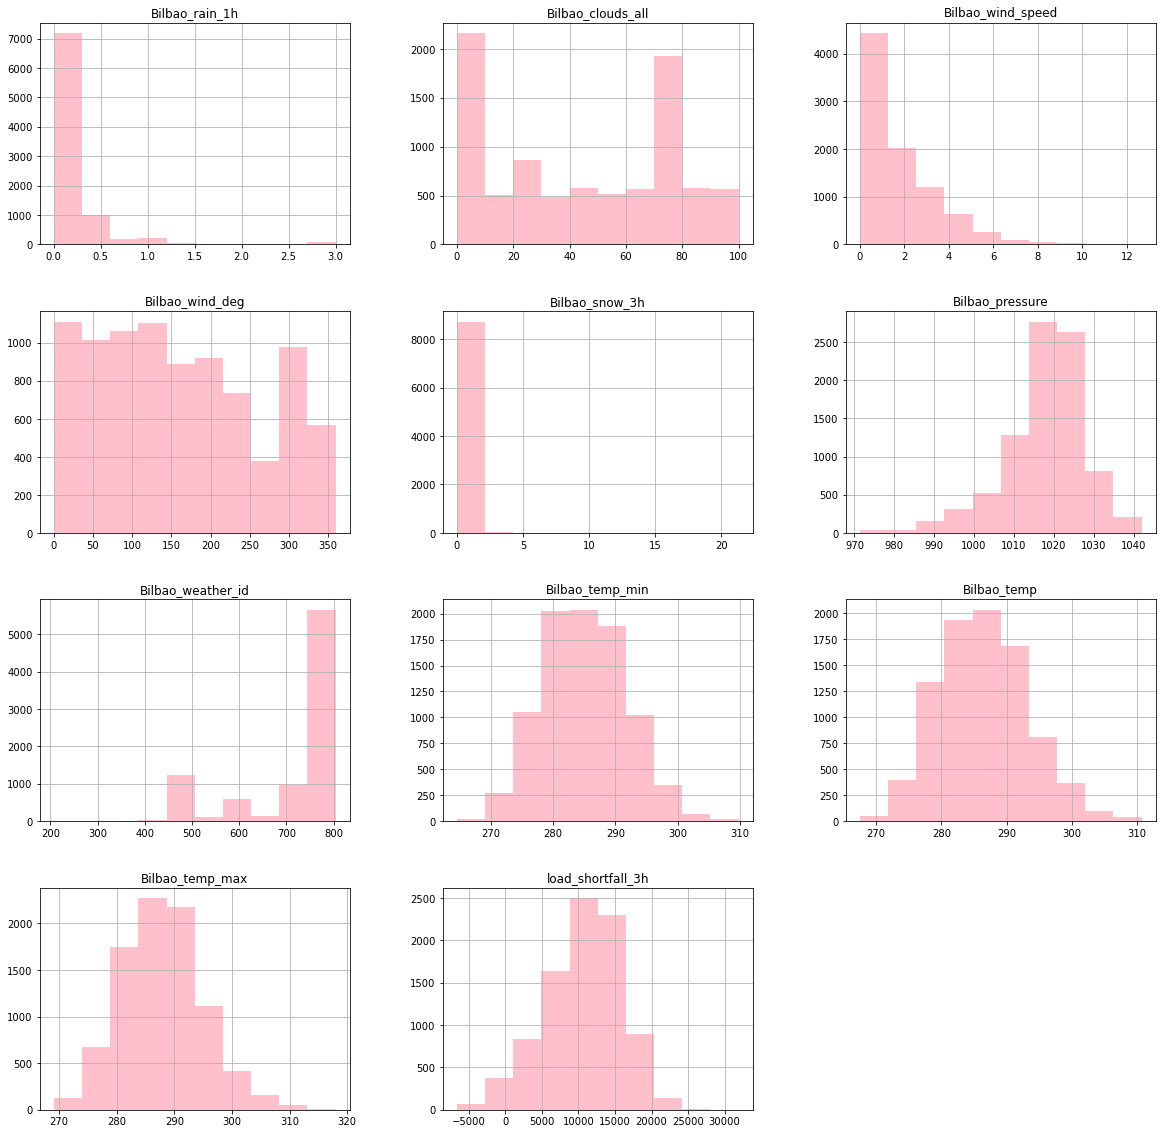

In [24]:
# # have a look at feature distributions Using histogram Plots
bilbao.hist(figsize=(20,20), color = 'pink');

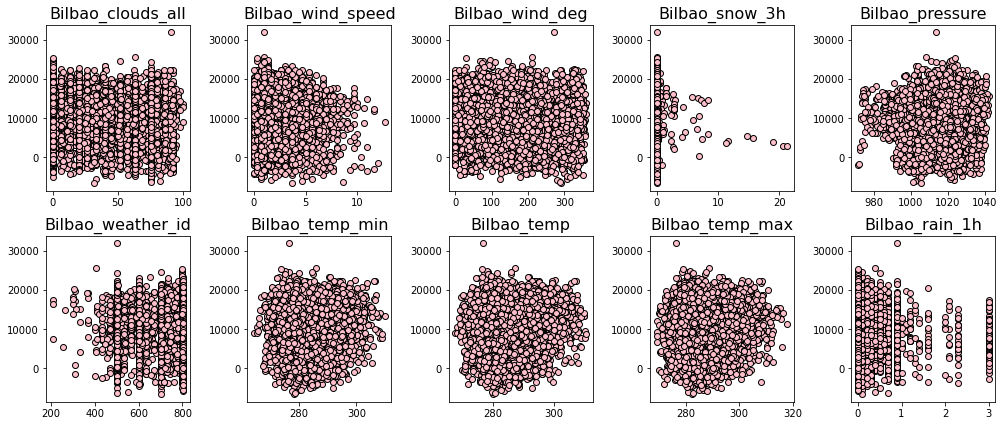

In [25]:
# Make Scatter Plots of Variables vs load_shortfall_3h
scatter_plot(bilbao, color = 'pink')

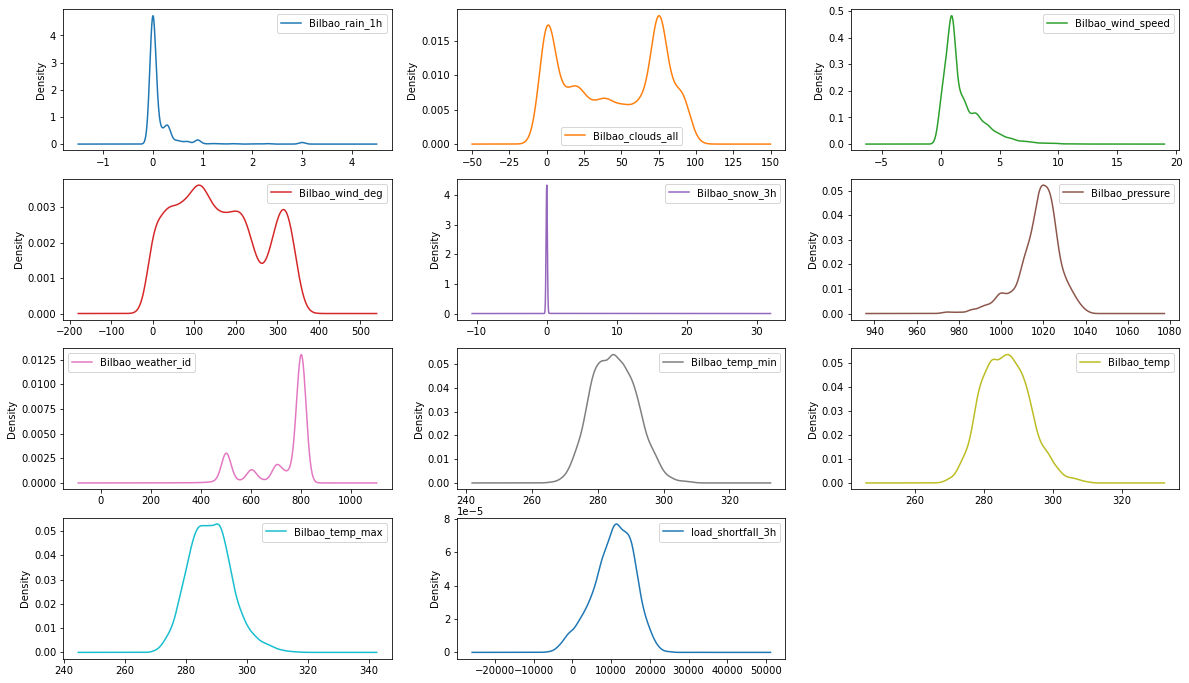

In [26]:
# have a look at feature distributions
bilbao.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,40))
plt.show()

**Comments**

**Bilbao_snow_3h** values are relatively zero all through the distribution and are concentrated more on a given point which represents a particular time period.

**Bilbao_wind_speed and bilbao_rain** are highly skewed to the right having most of their values spread towards the right.

**Bilbao_weather_id** is a bit left skewed but shows a somewhat fluctuation in the distribution of data points on the KDE plots.

**Bilbao_temp_min, Bilbao_temp_max and Bilbao_temp** all follow a uniform distribution, a have a very similar spread of data amongst themselves.

**Bilbao_clouds_all** shows two peak periods each residing on the negative and positive regions of the KDE plot.**Bilbao_wind_deg** also shows a similar characteristics in terms of having two peak periods, but  seem to exist at the positive region and have very little or no observation on the negative axis.

## Correlation

**Correlation Between Each Variable (Multicollinearity)**

As a rule of Thumb, Normally we do not want our predictor variables to have a very high correlation with one another, as this would prevent a fitted Machine Learning model from learning the actual relationship between each individual predictor and the response variable. What we do desire is a high correlation (Negative or Positive) with each predictor variable and the response variable.

Thos Variables whose correlation with themselves are very high (above a set threshold) would be candiates for dropping.

In [27]:
# Define function to visualize correlation heatmap between each numerical variables
def heat_map(data):
    corr_data = data[[col for col in data.columns if data[col].dtype == float and col != 'load_shortfall_3h']]
    plt.figure(figsize=(15,10))
    mask = np.triu(np.ones_like(corr_data.corr(),
                                dtype=np.bool))
    heatmap = sns.heatmap(corr_data.corr(), vmin =-1,
                          vmax=1, annot =True, mask= mask, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad = 12)

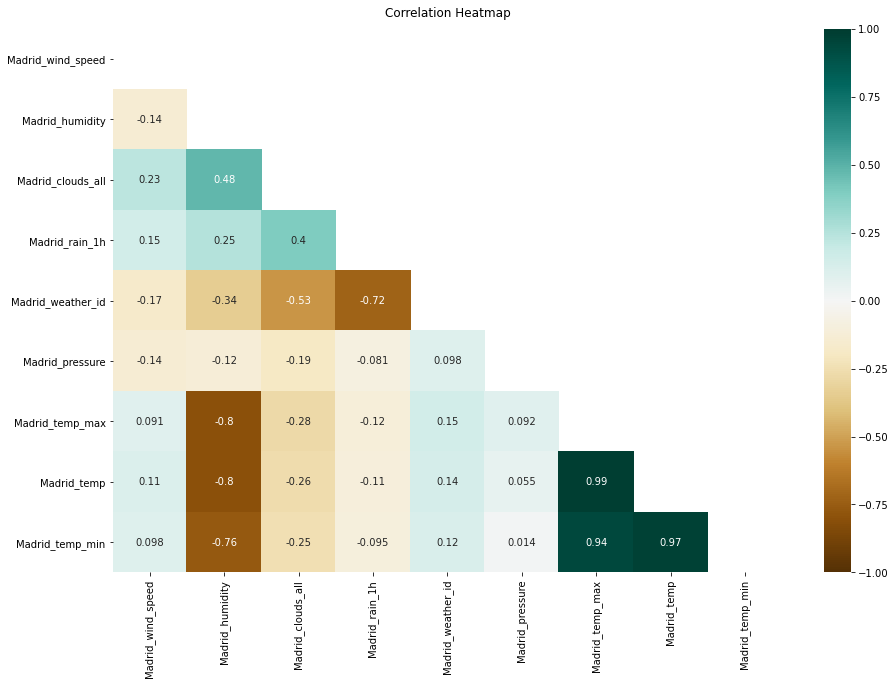

In [28]:
# Correlation heatmap for Madrid
heat_map(madrid)

**Comments**

If we set a correlation threshold of + or - 0.9 as the cut off, we would see that **madrid_temp_max, madrid_temp_min and madrid_temp** are highly positively correlated with each other, which means that their values move at the same direction mostly, i.e an increase in one also means an increase in the other and vice versa. 

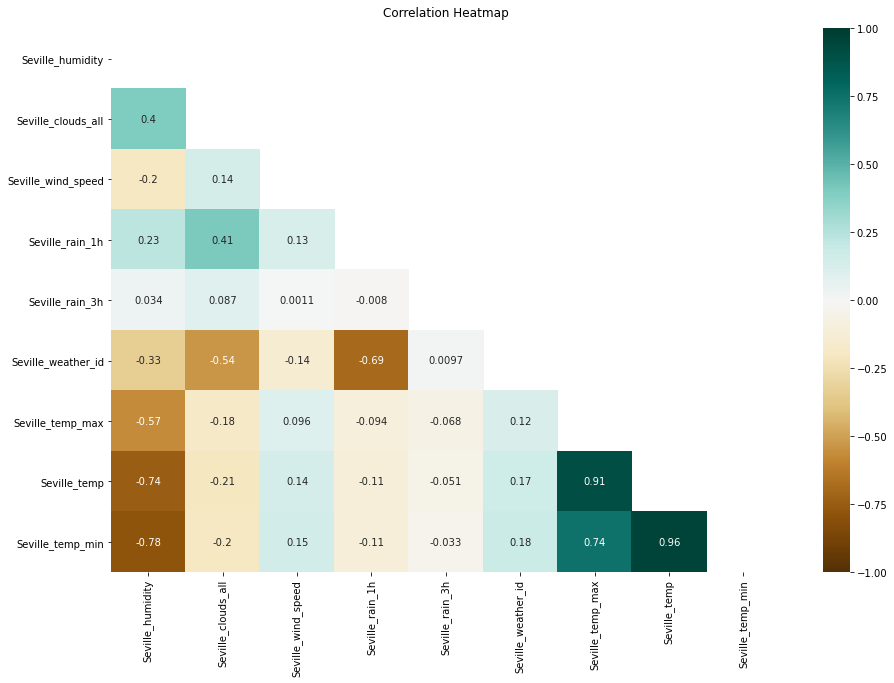

In [29]:
# Correlation heatmap for Seville
heat_map(seville)

**Comments**

As with the heatmap plot for madrid, using the same threshold  **Seville_temp_max, Seville_temp_min and Seville_temp** are highly positively correlated with each other, which means that their values move at the same direction mostly, i.e an increase in one also means an increase in the other and vice versa. 

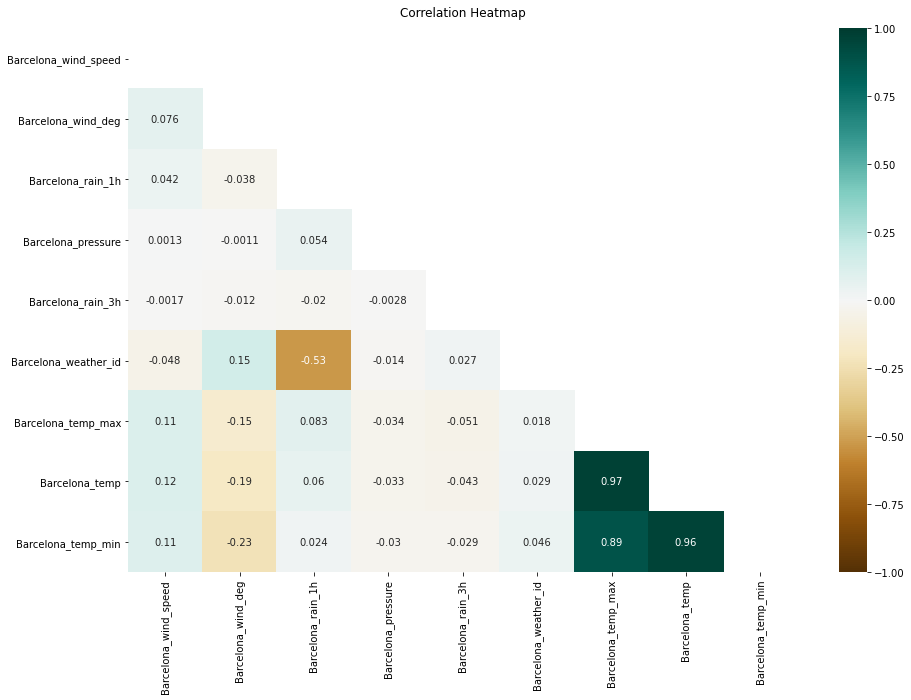

In [30]:
# Correlation heatmap for Barcelona
heat_map(barcelona)

**Comments**

We could see a similar trend in the high correlation of the temperature variables here also, but we coul also observe a slight decrease in the value of the correlation between **Barcelona_temp_min and Barcelona_temp_max**  0.89 which is approximately 0.01 less than our earlier set threshold of 0.9 for high correlation between variables.

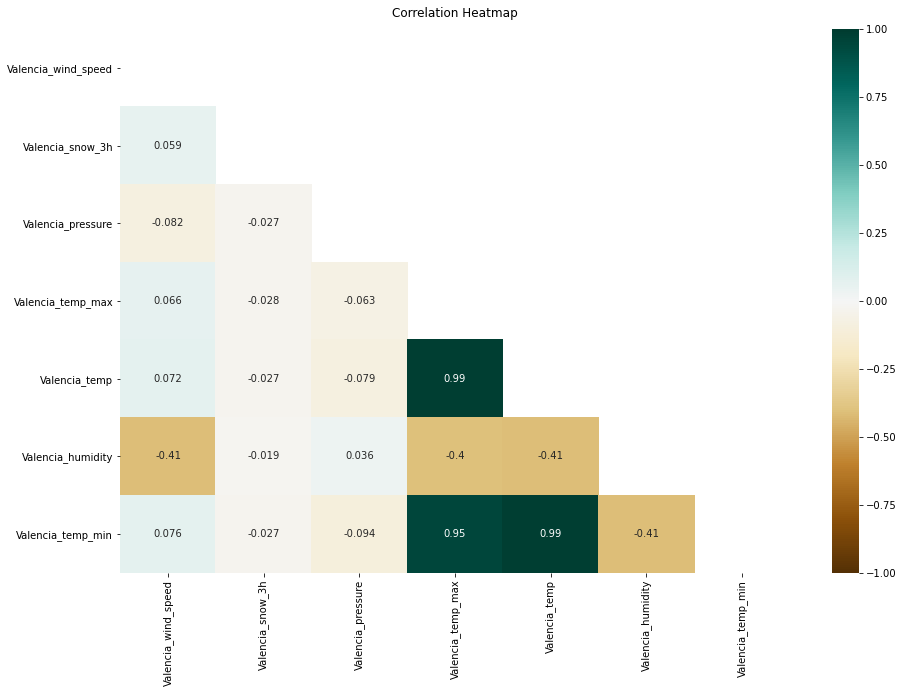

In [31]:
# Correlation heatmap for Valencia
heat_map(valencia)

As with the other states, **Valencia_temp, Valencia_temp_min and Valencia_temp_max** are all well highly correlated with one another.

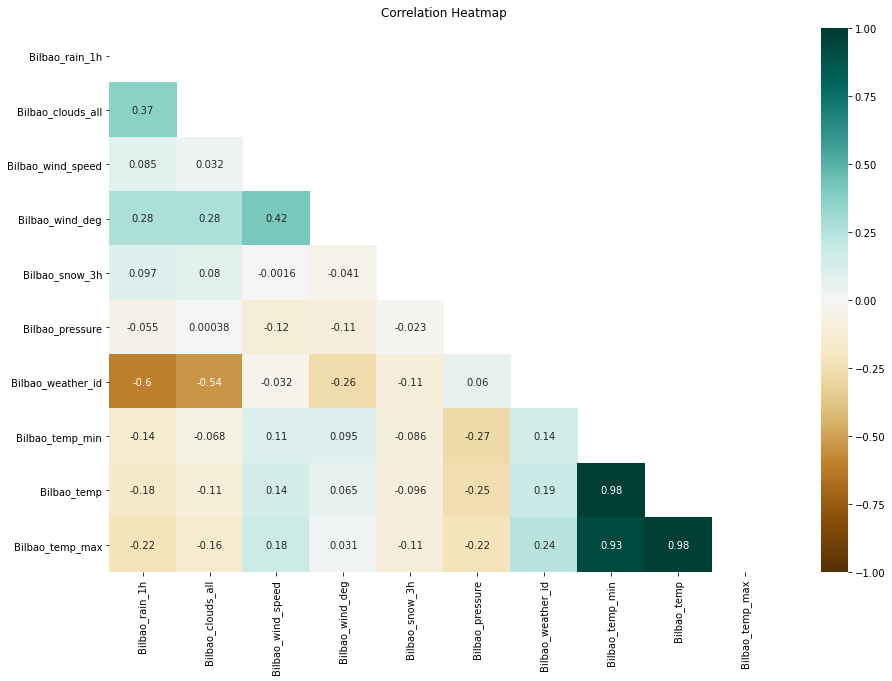

In [32]:
# Correlation heatmap for Bilbao
heat_map(bilbao)

**Bilao_temp, Bilbao_temp_min and Bilbao_temp_max** are all highly correlated with each other, and we could also observe this expected behaviour from the KDE plots and the scatter plots where these variables all had identical distributions

## Statistical Analysis of Variables

we would be carrying out the following statistical test on the dataset

**1. Variance threshold test**

**2. P-value test**

to aid the analysis, we would create functions to help with these computations

Going forward we would make a copy of the dataframe and store in a new variable called df_train.

In [33]:
def pearson_pval(data_):
    data = data_.copy()
    data = data.fillna(data.mean)
    #Compute correlation of predictors with response variable
    corr_df = data.corr()['load_shortfall_3h'].sort_values(ascending = False)
    # Build dictionary that would store correlation values and P-Values
    corr_dict = {}
    ## Select all columns except load_shortfall_3h from data
    col_titles = [col for col in corr_df.index if col != 'load_shortfall_3h']
    for column in col_titles:
        # Calculate p-value for all predictors with respect to load_shortfall_3h
        p_val = round(pearsonr(data[column], data['load_shortfall_3h'])[1],6)
        corr_dict[column] = {'Correlation_coeff': corr_df[column],
                             'P_Value': p_val}
    # Create Dataframe of p-values and feature names 
    p_val_df = pd.DataFrame(corr_dict).T
    p_val_df = p_val_df.reset_index()
    p_val_df = p_val_df.rename(columns= {'index':'Variable_Name'})
    return p_val_df

In [34]:
def variance_threshold(data, threshold = 0.03):
    # create a list of all x variables 
    excluded_cols = ['time','load_shortfall_3h','Valencia_wind_deg','Seville_pressure']
    x_names = [col for col in data.columns if col not in excluded_cols]
    # Select just the predictors from the data
    x_data = data[x_names]
    # Instantiate an object of the scaler class
    scaler = MinMaxScaler()
    # fit data to scaler object
    x_scaled = scaler.fit_transform(x_data)
    # create dataframe for scaled dataset
    x_normalized = pd.DataFrame(x_scaled, columns = x_data.columns)
    # Instantiate VarianceThreshold class
    selector = VarianceThreshold(threshold = threshold)
    # fit normalized data to varianceeshold object
    selector.fit(x_normalized)
    # compute variance
    col_variance = selector.variances_
    variance_dict = {}
    # Create dictionary of variance score and feature names
    variance_dict = [{'Variable_Name': column_name, 'Variance': col_var}
                     for column_name, col_var in zip(x_normalized.columns,col_variance)]
    var_df = pd.DataFrame(variance_dict)
    return var_df

In [35]:
def show_selected_variable(data,threshold = 0.02):
    excluded_cols = ['time','load_shortfall_3h','Valencia_wind_deg','Seville_pressure']
    data_ = data[[col for col in data.columns if col not in excluded_cols]]
    # Instantiate scaler object
    scaler = MinMaxScaler()
    # fit Data to scaler object
    normalized = scaler.fit_transform(data_)
    # Convert scaled data to Dataframe
    x_normalized = pd.DataFrame(normalized, columns = data_.columns)
    # Instantiate Threshold Class 
    selector = VarianceThreshold(threshold = threshold)
    # Fit scaled data to threshold object
    selector.fit(x_normalized)
    # Get selected data
    x_new = x_normalized.columns[selector.get_support(indices=True)]
    return x_new

In [36]:
# Instantiate threshold function
threshold = variance_threshold(df)
# Instantiate correlation function
p_values = pearson_pval(df)
# join the two tables
values = pd.merge(threshold, p_values, on = 'Variable_Name')
# Sort values by Variance
values = values.sort_values(by='Variance', ascending = True)
values

,Variable_Name,Variance,Correlation_coeff,P_Value
16,Barcelona_pressure,0.000198,-0.034385,0.001285
20,Valencia_snow_3h,0.000225,-0.021633,0.042863
15,Bilbao_snow_3h,0.000684,-0.031721,0.002981
17,Seville_rain_3h,0.001537,-0.032945,0.002040
19,Barcelona_rain_3h,0.001844,-0.024720,0.020665
2,Valencia_wind_speed,0.002150,-0.142791,0.000000
18,Madrid_rain_1h,0.002588,-0.027159,0.011008
13,Barcelona_rain_1h,0.002797,-0.056633,0.000000
14,Seville_rain_1h,0.003436,-0.031572,0.003118
24,Seville_weather_id,0.014185,0.061104,0.000000


**Analysis**

We can see from the table that none of the variables have a high correlation with the response variable, no correlation value of up to + or - 0.5 was recorded in the dataset. as a consequence fitting this dataset to a simple linear regressor would perform very poorly as there is little or no relationship to learn from the dataset.

If we set a p value significance level of < 0.03 we would see that valencia_snow_3h is above this threshold and is deemed statistically insignificant.

The table above shows the variance values of all the features, the variance values show how much change of values occurs in a feature over time. if we set a variance threshold of say 0.02, all values which fall beneath this threshold would ideally offer little for the machine learning model to learn from. It must be noted that the choosing of a variance threshold is somewhat subjective and the value can vary across datasets.

Now let us show only those features that are above the chosen threshold value of 0.02 variance.

In [37]:
show_selected_variable(df)

Index(['Madrid_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min'],
      dtype='object')

From these selected columns, some of them are highly multicollinear, and should be considered for exclsuion as their values basically report the same information with a little difference. Values like temp, temp_min and temp_max for all states are very similar, and this fact is supported from the visuals we saw earlier from the KDE distribution plots and the calculation of the mean and median of these states.

**Categorical Variable**

There are two categorical variables in the datset **Seville_pressure** and **Valencia_wind_degree** we would compare these variables with their counterparts from the other states.

In [53]:
wind_deg = [col for col in df if col.endswith('deg')]
df[wind_deg].head()

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_5,223.333333,42.666667
1,level_10,221.000000,139.000000
2,level_9,214.333333,326.000000
3,level_8,199.666667,273.000000
4,level_7,185.000000,260.000000


In [54]:
pressure = [col for col in df if col.endswith('pressure')]
df[pressure].head()

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,sp25,1036.333333,1035.000000,1002.666667,971.333333
1,sp25,1037.333333,1035.666667,1004.333333,972.666667
2,sp25,1038.000000,1036.000000,1005.333333,974.000000
3,sp25,1037.000000,1036.000000,1009.000000,994.666667
4,sp25,1035.000000,1035.333333,NaN,1035.333333


The values of Valencia_wind_deg is categorical unlike Bilba_wind_deg and Barcelona_wind_deg which are numerical, to use this data we would have to find additional information about what each category of wind_deg in Valencia stands for. as an easy way out we might have to drop this variable from the model variables.

The same thing can be said about the pressure values of Seville. as an alternative we might opt to create dummies for each category, but this would lead to having extra features summing up to 35, and given that our training features are already plenty we might want to avoid this.


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [3]:
df_train = df.copy()

In [4]:
# remove or fill missing values/ features
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mean())

In [5]:
# Drop categorical Variables
df_train = df_train.drop(columns = ['Valencia_wind_deg','Seville_pressure'])

In [6]:
# engineer existing features
df_train['time'] = pd.to_datetime(df_train.time, format = '%Y-%m-%d %H:%M:%S')

In [7]:
# create new features
df_train['Month'] = df_train.time.dt.month # Create Month feature from time
df_train['Day'] = df_train.time.dt.day # Create Day feature from time
df_train['Hour'] = df_train.time.dt.hour # Create Hour feature from time
df_train = df_train.drop(columns = ['time']) # Drop time feature

In [8]:
# Convert time variables from numerical to categorical 
time_cols = ['Month', 'Day', 'Hour']
df_train[time_cols] = df_train[time_cols].astype('category')

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

From the insights gained from the EDA and Statistical tests, we would arrange training data into sets and train several models on each sets, these sets are as listed below:

**Note**

The two categorical features **Valencia_wind_deg** and **Seville_pressure** would be excluded from all training data.

**1. All Features from the original Data Excluding newly Engineered time features(train_set1)**

**2. All Features with The newly Engineered time features (train_set2)**

**3. All Features From the Statistical Test plus newly Engineered time features (train_set3)**

**4. Subset of Features from Statistical Test (Excluding multicollinear Values) plus Engineered time features(train_set4)**

In [9]:
# Create train datasetgroups
time_cols = ['Month', 'Day', 'Hour'] # Engineered features
statistical_cols = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_clouds_all',
                    'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
                    'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
                    'Seville_wind_speed', 'Bilbao_snow_3h', 'Barcelona_pressure',
                    'Seville_rain_3h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
                    'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
                    'Seville_weather_id', 'Madrid_pressure', 'Valencia_temp',
                    'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity','load_shortfall_3h',
                    'Barcelona_temp', 'Bilbao_temp','Madrid_temp','Hour','Day','Month'] # Cols With good statistical significance

multi_collinear_cols = ['Valencia_temp_min','Valencia_temp_max','Bilbao_temp_min',
                        'Bilbao_temp_max','Barcelona_temp_min','Barcelona_temp_max',
                        'Seville_temp_min','Seville_temp_max','Madrid_temp_min',
                        'Madrid_temp_max','Bilbao_rain_1h',
                        'Barcelona_rain_1h',
                        'Seville_rain_1h','Madrid_rain_1h']           # Highly multicollinear features
train_set1 = df_train.drop(columns = time_cols) # Without time columns
train_set2 = df_train.copy()  # Entire train data with time columns
train_set3  = df_train.drop(columns = multi_collinear_cols) # Train data without collinear columns
train_set4 = df_train[statistical_cols] # Train data from statistical tests

In [10]:
# check shape of train_sets
print('The Shape of train_set1 is: {}'.format(train_set1.shape))
print('The Shape of train_set2 is: {}'.format(train_set2.shape))
print('The Shape of train_set3 is: {}'.format(train_set3.shape))
print('The Shape of train_set4 is: {}'.format(train_set4.shape))

The Shape of train_set1 is: (8763, 45)
The Shape of train_set2 is: (8763, 48)
The Shape of train_set3 is: (8763, 34)
The Shape of train_set4 is: (8763, 31)


Next we create a function using scikit-learn train_test_split function for splitting of the train dataset for modellling.

This is a time series data, we do not want a random split of our dataset so we can retain the information from eacg succesive time step, so we would set the shuffle parameter of the train_test_split function to False

The function would take a pandas dataframe and first split it into x and y variables, then create a test and train split from the x and y variable.

we would be performing a two fold split using a 80:20 percent train:test split ratio. a default random state of 40 would be used for all the splits

In [11]:
# split data
#Create split data function for reusability
def split_data(data):
    # create targets and features dataset
    x = data.drop('load_shortfall_3h', axis=1)
    y = data['load_shortfall_3h']
    # Use train test split function to split data into train and test
    x_train,x_test, y_train,y_test = train_test_split(x,y,
                                                     random_state = PARAMETER_CONSTANT,
                                                     test_size = 0.2)
    return x_train, x_test, y_train,y_test

Now we create five distinct models using the 4 sets of data we have created. all models would be created using the data train set and evaluated using the test set. the target models are;

**1. Linear Regression**

**2. Lasso Regression**

**3. Support Vector Regressor**

**4. Random Forest Regressor**

**5. Voting Regressor**

**6. Stacking Regressor**

**Evaluate Model on train_set**

For the model evaluation we would be computing the R-squared value which shows the degree of variance explained by our model and the mean_squared_error which is the root of the mean of the square of differencehe true and predicted values

In [12]:
# Function for evaluating model on both train and test set
def evaluate_model(x, y, x_lasso,linear,lasso,svr,forest,stack,vote, set_ = 'Set1'):
    # evaluate models on train set
    pred_linear = linear.predict(x)
    pred_lasso = lasso.predict(x_lasso)
    pred_svr = svr.predict(x)
    pred_forest = forest.predict(x)
    pred_stack = stack.predict(x)
    pred_vote = vote.predict(x)
    mse_lin = round(np.sqrt(mean_squared_error(y, pred_linear)),2)
    mse_lasso = round(np.sqrt(mean_squared_error(y, pred_lasso)),2)
    mse_svr = round(np.sqrt(mean_squared_error(y, pred_svr)),2)
    mse_forest = round(np.sqrt(mean_squared_error(y, pred_forest)),2)
    mse_stack = round(np.sqrt(mean_squared_error(y, pred_stack)),2)
    mse_vote = round(np.sqrt(mean_squared_error(y, pred_vote)),2)
    r2_lin = round(r2_score(y, pred_linear),2)
    r2_lasso = round(r2_score(y, pred_lasso),2)
    r2_svr = round(r2_score(y, pred_svr),2)
    r2_forest = round(r2_score(y, pred_forest),2)
    r2_stack = round(r2_score(y, pred_stack),2)
    r2_vote = round(r2_score(y, pred_vote),2)
    train_scores = pd.DataFrame({'Models':['Linear Model','Lasso model','SVR',
                                           'Random Forest','Stack Regressor',
                                           'Voting Regressor'],
                                 'RMSE_{}'.format(set_): [mse_lin,mse_lasso,mse_svr,
                                         mse_forest, mse_stack, mse_vote],
                                 'R-Squared_{}'.format(set_): [r2_lin,r2_lasso,r2_svr,r2_forest,
                                              r2_stack,r2_vote]})
    train_scores = train_scores.sort_values(by = 'RMSE_{}'.format(set_))
    
    return train_scores

## Train Set Group 1 Data

In [48]:
# create one or more ML models
# Call split_data function to get train data set1
x_train1, x_test1, y_train1, y_test1 = split_data(train_set1)

**1 a). Linear Regression Model**

In [49]:
# Create Linear Model Object
linear_model1 = LinearRegression()
# fit model to train data
linear_model1.fit(x_train1,y_train1)

LinearRegression()

**1 b). Lasso Model**

In [50]:
# for lasso reg we have to scale the x_train data
scaler = StandardScaler()
# fit and transform the train_data to scaler object
lasso_x_train1 = scaler.fit_transform(x_train1)
# transform the test set
lasso_x_test1 = scaler.transform(x_test1)
# Create a lasso_model object
lasso_model1 = Lasso(alpha = 0.05)
# fit a lasso model
lasso_model1.fit(lasso_x_train1,y_train1)

Lasso(alpha=0.05)

**1 c). Support Vector Regression Model**

In [51]:
# Create SVR Model Object
svr_model1 = SVR()
# fit model to train data
svr_model1.fit(x_train1,y_train1)

SVR()

**1 d). Random Forest Regressor**

In [52]:
# Create Random forest Model Object
forest_model1 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
# fit model to train data
forest_model1.fit(x_train1,y_train1)

RandomForestRegressor(random_state=13)

**1 e).Stacking Regressor Model**

In [53]:
s1_lin = LinearRegression()
s1_svr = SVR(kernel ='rbf', gamma = 'auto')
s1_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
s_models1 = [('LN',s1_lin),('SVR',s1_svr),('RF',s1_forest)]
s_meta_learner1 = LinearRegression()
stack_reg1 = StackingRegressor(estimators=s_models1,final_estimator=s_meta_learner1)
stack_reg1.fit(x_train1,y_train1)

StackingRegressor(estimators=[('LN', LinearRegression()),
                              ('SVR', SVR(gamma='auto')),
                              ('RF', RandomForestRegressor(random_state=13))],
                  final_estimator=LinearRegression())

**1 f).Voting Regressor Model**

In [54]:
v1_lin = LinearRegression()
v1_svr = SVR(kernel ='rbf', gamma = 'auto')
v1_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
v_models1 = [('LN',v1_lin),('SVR',v1_svr),('RF',v1_forest)]
model_weightings1 = np.array([0.2,0.1,0.7])
vote_reg1 = VotingRegressor(estimators=v_models1, weights = model_weightings1)
vote_reg1.fit(x_train1,y_train1)

VotingRegressor(estimators=[('LN', LinearRegression()),
                            ('SVR', SVR(gamma='auto')),
                            ('RF', RandomForestRegressor(random_state=13))],
                weights=array([0.2, 0.1, 0.7]))

## Train Set Group 2 Data

In [55]:
# Call split_data function to get train data set2
x_train2, x_test2, y_train2, y_test2 = split_data(train_set2)

**2 a). Linear Regression Model**

In [56]:
# Create Linear Model Object
linear_model2 = LinearRegression()
# fit model to train data
linear_model2.fit(x_train2,y_train2)

LinearRegression()

**2 b). Lasso Model**

In [57]:
# for lasso reg we have to scale the x_train data
scaler = StandardScaler()
# fit and transform the train_data to scaler object
lasso_x_train2 = scaler.fit_transform(x_train2)
# transform the test set
lasso_x_test2 = scaler.transform(x_test2)
# Create a lasso_model object
lasso_model2 = Lasso(alpha = 0.05)
# fit a lasso model
lasso_model2.fit(lasso_x_train2,y_train2)

Lasso(alpha=0.05)

**2 c). Support Vector Regression Model**

In [58]:
# Create SVR Model Object
svr_model2 = SVR()
# fit model to train data
svr_model2.fit(x_train2,y_train2)

SVR()

**2 d). Random Forest Regressor**

In [59]:
# Create Random forest Model Object
forest_model2 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
# fit model to train data
forest_model2.fit(x_train2,y_train2)

RandomForestRegressor(random_state=13)

**2 e). Stacking Regressor Model**

In [60]:
s2_lin = LinearRegression()
s2_svr = SVR(kernel ='rbf', gamma = 'auto')
s2_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
s_models2 = [('LN',s2_lin),('SVR',s2_svr),('RF',s2_forest)]
s_meta_learner2 = LinearRegression()
stack_reg2 = StackingRegressor(estimators=s_models2,final_estimator=s_meta_learner2)
stack_reg2.fit(x_train2,y_train2)

StackingRegressor(estimators=[('LN', LinearRegression()),
                              ('SVR', SVR(gamma='auto')),
                              ('RF', RandomForestRegressor(random_state=13))],
                  final_estimator=LinearRegression())

**2 f). Voting Regressor Model**

In [61]:
v2_lin = LinearRegression()
v2_svr = SVR(kernel ='rbf', gamma = 'auto')
v2_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
v_models2 = [('LN',v2_lin),('SVR',v2_svr),('RF',v2_forest)]
model_weightings2 = np.array([0.2,0.1,0.7])
vote_reg2 = VotingRegressor(estimators=v_models2, weights = model_weightings2)
vote_reg2.fit(x_train2,y_train2)

VotingRegressor(estimators=[('LN', LinearRegression()),
                            ('SVR', SVR(gamma='auto')),
                            ('RF', RandomForestRegressor(random_state=13))],
                weights=array([0.2, 0.1, 0.7]))

## Train Set Group 3 Data

In [62]:
# Call split_data function to get train data set1
x_train3, x_test3, y_train3, y_test3 = split_data(train_set3)

**3 a). Linear Regression Model**

In [63]:
# Create Linear Model Object
linear_model3 = LinearRegression()
# fit model to train data
linear_model3.fit(x_train3,y_train3)

LinearRegression()

**3 b). Lasso Model**

In [64]:
# for lasso reg we have to scale the x_train data
scaler = StandardScaler()
# fit and transform the train_data to scaler object
lasso_x_train3 = scaler.fit_transform(x_train3)
# transform the test set
lasso_x_test3 = scaler.transform(x_test3)
# Create a lasso_model object
lasso_model3 = Lasso(alpha = 0.05)
# fit a lasso model
lasso_model3.fit(lasso_x_train3,y_train3)

Lasso(alpha=0.05)

**3 c). Support Vector Regression Model**

In [65]:
# Create SVR Model Object
svr_model3 = SVR()
# fit model to train data
svr_model3.fit(x_train3,y_train3)

SVR()

**3 d). Random Forest Regressor**

In [66]:
# Create Random forest Model Object
forest_model3 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
# fit model to train data
forest_model3.fit(x_train3,y_train3)

RandomForestRegressor(random_state=13)

**3 e). Stacking Regressor Model**

In [67]:
s3_lin = LinearRegression()
s3_svr = SVR(kernel ='rbf', gamma = 'auto')
s3_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
s_models3 = [('LN',s3_lin),('SVR',s3_svr),('RF',s3_forest)]
s_meta_learner3 = LinearRegression()
stack_reg3 = StackingRegressor(estimators=s_models3,final_estimator=s_meta_learner3)
stack_reg3.fit(x_train3,y_train3)

StackingRegressor(estimators=[('LN', LinearRegression()),
                              ('SVR', SVR(gamma='auto')),
                              ('RF', RandomForestRegressor(random_state=13))],
                  final_estimator=LinearRegression())

**3 f). Voting Regressor Model**

In [68]:
v3_lin = LinearRegression()
v3_svr = SVR(kernel ='rbf', gamma = 'auto')
v3_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
v_models3 = [('LN',v3_lin),('SVR',v3_svr),('RF',v3_forest)]
model_weightings3 = np.array([0.2,0.1,0.7])
vote_reg3 = VotingRegressor(estimators=v_models3, weights = model_weightings3)
vote_reg3.fit(x_train3,y_train3)

VotingRegressor(estimators=[('LN', LinearRegression()),
                            ('SVR', SVR(gamma='auto')),
                            ('RF', RandomForestRegressor(random_state=13))],
                weights=array([0.2, 0.1, 0.7]))

## Train Set Group 4 Data

In [31]:
# Call split_data function to get train data set1
x_train4, x_test4, y_train4, y_test4 = split_data(train_set4)

**4 a). Linear Regression Model**

In [70]:
# Create Linear Model Object
linear_model4 = LinearRegression()
# fit model to train data
linear_model4.fit(x_train4,y_train4)

LinearRegression()

**4 b). Lasso Model**

In [71]:
# for lasso reg we have to scale the x_train data
scaler = StandardScaler()
# fit and transform the train_data to scaler object
lasso_x_train4 = scaler.fit_transform(x_train4)
# transform the test set
lasso_x_test4 = scaler.transform(x_test4)
# Create a lasso_model object
lasso_model4 = Lasso(alpha = 0.05)
# fit a lasso model
lasso_model4.fit(lasso_x_train4,y_train4)

Lasso(alpha=0.05)

**4 c). Support Vector Regression Model**

In [72]:
# Create SVR Model Object
svr_model4 = SVR()
# fit model to train data
svr_model4.fit(x_train4,y_train4)

SVR()

**4 d). Random Forest Regressor**

In [62]:
# Create Random forest Model Object
forest_model4 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
# fit model to train data
forest_model4.fit(x_train4,y_train4)

RandomForestRegressor(random_state=13)

**5 e). Stacking Regressor Model**

In [74]:
s4_lin = LinearRegression()
s4_svr = SVR(kernel ='rbf', gamma = 'auto')
s4_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
s_models4 = [('LN',s4_lin),('SVR',s4_svr),('RF',s4_forest)]
s_meta_learner4 = LinearRegression()
stack_reg4 = StackingRegressor(estimators=s_models4,final_estimator=s_meta_learner4)
stack_reg4.fit(x_train4,y_train4)

StackingRegressor(estimators=[('LN', LinearRegression()),
                              ('SVR', SVR(gamma='auto')),
                              ('RF', RandomForestRegressor(random_state=13))],
                  final_estimator=LinearRegression())

**4 f). Voting Regressor Model**

In [75]:
v4_lin = LinearRegression()
v4_svr = SVR(kernel ='rbf', gamma = 'auto')
v4_forest = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
v_models4 = [('LN',v4_lin),('SVR',v4_svr),('RF',v4_forest)]
model_weightings4 = np.array([0.2,0.1,0.7])
vote_reg4 = VotingRegressor(estimators=v_models4, weights = model_weightings4)
vote_reg4.fit(x_train4,y_train4)

VotingRegressor(estimators=[('LN', LinearRegression()),
                            ('SVR', SVR(gamma='auto')),
                            ('RF', RandomForestRegressor(random_state=13))],
                weights=array([0.2, 0.1, 0.7]))

**Evaluate Model on train_set**

In [76]:
set1 = evaluate_model(x_train1, y_train1,lasso_x_train1,linear_model1,lasso_model1,svr_model1,forest_model1,stack_reg1,vote_reg1,set_='TrainSet1') # Train Model Data Set 1 
set2 = evaluate_model(x_train2, y_train2,lasso_x_train2,linear_model2,lasso_model2,svr_model2,forest_model2,stack_reg2,vote_reg2, set_='TrainSet2') # Train Model Data Set 2
set3 = evaluate_model(x_train3, y_train3,lasso_x_train3,linear_model3,lasso_model3,svr_model3,forest_model3,stack_reg3,vote_reg3,set_='TrainSet3') # Train Model Data Set 3 
set4 = evaluate_model(x_train4, y_train4,lasso_x_train4,linear_model4,lasso_model4,svr_model4,forest_model4,stack_reg4,vote_reg4,set_='TrainSet4') # Train Model Data Set 4

In [77]:
# Merge all the evaluation metrics into one table
merged = reduce(lambda  left,right: pd.merge(left,
                   right, on = 'Models',
                    how='inner'), [set1,set2,set3,set4])

In [78]:
#Display only the rmse scores from all 5 models and 4 data set groups
rmse = merged[['Models','RMSE_TrainSet1','RMSE_TrainSet2','RMSE_TrainSet3','RMSE_TrainSet4']]
rmse

,Models,RMSE_TrainSet1,RMSE_TrainSet2,RMSE_TrainSet3,RMSE_TrainSet4
0,Stack Regressor,1044.02,1075.00,1057.17,1056.02
1,Random Forest,1627.13,1230.24,1239.32,1238.26
2,Voting Regressor,2540.71,2146.35,2172.56,2175.60
3,Linear Model,4795.82,4716.25,4790.72,4813.78
4,Lasso model,4796.59,4716.99,4790.72,4813.78
5,SVR,5214.91,5214.91,5214.91,5214.91


In [79]:
r_squared = merged[['Models','R-Squared_TrainSet1','R-Squared_TrainSet2','R-Squared_TrainSet3','R-Squared_TrainSet4']]
r_squared

,Models,R-Squared_TrainSet1,R-Squared_TrainSet2,R-Squared_TrainSet3,R-Squared_TrainSet4
0,Stack Regressor,0.96,0.96,0.96,0.96
1,Random Forest,0.90,0.94,0.94,0.94
2,Voting Regressor,0.76,0.83,0.83,0.82
3,Linear Model,0.15,0.18,0.15,0.14
4,Lasso model,0.15,0.18,0.15,0.14
5,SVR,-0.01,-0.01,-0.01,-0.01


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

**Evaluate Models on Test DataSet**

In [80]:
test_set1 = evaluate_model(x_test1, y_test1,lasso_x_test1,linear_model1,lasso_model1,svr_model1,forest_model1,stack_reg1,vote_reg1, set_='TestSet1') # Test Model Data Set 1
test_set2 = evaluate_model(x_test2, y_test2,lasso_x_test2,linear_model2,lasso_model2,svr_model2,forest_model2,stack_reg2,vote_reg2, set_='TestSet2') # Test Model Data Set 2
test_set3 = evaluate_model(x_test3, y_test3,lasso_x_test3,linear_model3,lasso_model3,svr_model3,forest_model3,stack_reg3,vote_reg3, set_='TestSet3') # Test Model Data Set 3
test_set4 = evaluate_model(x_test4, y_test4,lasso_x_test4,linear_model4,lasso_model4,svr_model4,forest_model4,stack_reg4,vote_reg4, set_='TestSet4') # Test Model Data Set 4


In [81]:
# Compare model performance
# Merge all the evaluation metrics into one table
merged_test = reduce(lambda  left,right: pd.merge(left,
                   right, on = 'Models',
                    how='inner'), [test_set1,test_set2,
                                   test_set3,test_set4])

In [82]:
#Display only the rmse scores from all 5 models and 4 data set groups
rmse_test = merged_test[['Models','RMSE_TestSet1','RMSE_TestSet2','RMSE_TestSet3','RMSE_TestSet4']]
rmse_test

,Models,RMSE_TestSet1,RMSE_TestSet2,RMSE_TestSet3,RMSE_TestSet4
0,Stack Regressor,4270.48,3230.67,3257.90,3262.14
1,Random Forest,4343.34,3274.25,3297.03,3298.54
2,Voting Regressor,4470.67,3549.10,3579.01,3581.84
3,Lasso model,4901.92,4845.04,4913.44,4930.20
4,Linear Model,4906.04,4849.59,4913.45,4930.20
5,SVR,5338.20,5338.20,5338.20,5338.20


In [84]:
# Display Only the R-Squared Scores
r_squared_test = merged_test[['Models','R-Squared_TestSet1','R-Squared_TestSet2','R-Squared_TestSet3','R-Squared_TestSet4']]
r_squared_test

,Models,R-Squared_TestSet1,R-Squared_TestSet2,R-Squared_TestSet3,R-Squared_TestSet4
0,Stack Regressor,0.35,0.63,0.62,0.62
1,Random Forest,0.33,0.62,0.61,0.61
2,Voting Regressor,0.29,0.55,0.54,0.54
3,Lasso model,0.14,0.16,0.14,0.13
4,Linear Model,0.14,0.16,0.14,0.13
5,SVR,-0.02,-0.02,-0.02,-0.02


Out of all the training dataset groups fitted on all 6 models, dataset groups 2, 3 and 4 stood out. 

**Data group2 has 48 features**

**Data group3 has 34 features**

**Data group4 has 31 features**

Comparing the results obtained by these 3 groups of datasets, on all 6 models, the following results were obtained:

**Stack Regressor** was the best perfoming model across all 3 data groups recording a **test RMSE & R-Squared** values of **3230.67** and **0.63** on unseen test data. This model was trained using data **group2**

This result is closely followed by **RMSE** Scores of **3257.90 and 3262.14** and **R-squared** values of **0.62 and 0.62** 
obtained from data groups **3 and 4** respectively.

In [ ]:
# Choose best model and motivate why it is the best choice

**Selection of Best Model**

From the above results we could see that the **Stack Regressor** is the best performing model amongst the 6, and is closely followed by the **Random Forest model** with a difference of 43.6 in the RMSE core. We have opted to Select the **Random Forest Regressor** Model because this model has only one  component as opposed to the **Stack Regressor** model which is a combination of the Linear **Regression Model, SVM model and Random Forest Model**.

Another reason for going for this **Random Forest** model rather than the **Stack Regressor** model, is that comparing the two models test RMSE scores, there is only about 1.33% increase in the performace which is a very small amount to trade for less training and evaluation time as well as compute time and resources.

Now that we have chosen a model, let us now consider what training features are appropriate for the model. From the results obtained, data **group2 with 48 features** had an **RMSE of 3274.25**, data **group3 with 34 features** had an **RMSE of 3297.03** and data **group4 with 31 features** had an **RMSE of 3298.54**. We have opted for data group4 as the chosen training features which makes **Random Forest4** model the chosen model.

There are several reasons why we have chosen this model and features some of which include;

1. Trading a 0.7% (0.0073) decrease in RMSE score for less training features 31 as opposed to 48. This is because if this model is to be deployed into production, it would cost less to collect data for all 48 features as opposed to 31 features to make predictions for a very small amount of improvement in the prediction accuracy.

2. Considering the fact that all the models were trained using the same train observations (not features) and considering the way methodch the random forest regressor uses data to arrive at a given decision node, one could argue that changing the Random state of the spliting process, we could have likely obtained better results for the other Random Forest4 Model when compared to Random Forest2 model. The one Thing that would have remained constant is the amount of train features for both models even after changing the Random state Values.


In [86]:
# Save chosen model to disk
model_name = 'Random_Forest.pkl'
with open(model_name, 'wb') as file:
    pickle.dump(forest_model4, file)

**Determination of The Most Important Features From the Random Forest Model**

The random forest model is very robust to outliers, and hence does not get affected by data that are on different scales. to calculate the most important features from our model, we can just call the .feature_importances_ function on the object of the model, and get the feature importance as numerical values where the larger numbers signify the more important features in the training phase.

In [81]:
# Use the feature importances method to get the feature weightings from model object
importances = forest_model4.feature_importances_
# Store the training features names in a list variable to map each feature to its importance
train_features = list(x_train4.columns)
# Create a dataframe of features and importance
feature_importance = pd.DataFrame({'Features':train_features,
                                  'Importance Weightings':importances})
# Sort the feature importances in descending order
feature_importance = feature_importance.sort_values(by = ['Importance Weightings'], ascending = False)
feature_importance

,Features,Importance Weightings
28,Day,1.810263e-01
27,Hour,1.349894e-01
29,Month,9.943992e-02
0,Madrid_wind_speed,4.830737e-02
17,Bilbao_pressure,4.371432e-02
23,Valencia_humidity,3.979906e-02
24,Barcelona_temp,3.629514e-02
11,Barcelona_pressure,3.629422e-02
22,Seville_temp,2.983013e-02
26,Madrid_temp,2.843079e-02


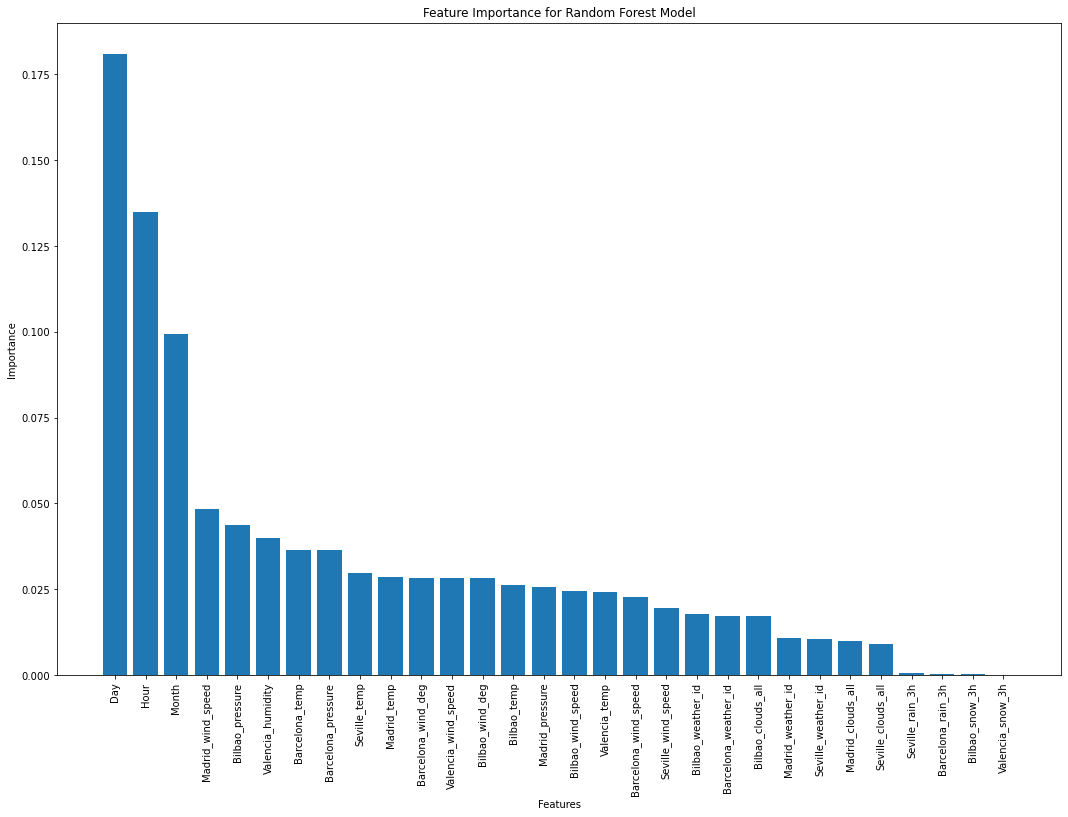

In [79]:
plt.figure(figsize=(18,12))
x = feature_importance['Features'] # Select features for x_axis
y = feature_importance['Importance Weightings'] # Select features for y_axis
plt.bar(x, y, ) #Plot the bar chart
plt.xticks(rotation=90)
# Set x and y axis titles
plt.ylabel('Importance')
plt.xlabel('Features') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title
plt.title('Feature Importance for Random Forest Model')

# Show graph
plt.show()

From the plot of the feature importances, we could see that the newly engineered features had a major role to play in the models predictions, with the daily attributes of each feature having the most to say. we could also see that the snow_data had the least impact on the model, and this is probably because the amount of snow throughout a calender year is limited to only a few months of the year, same thing can be said about the rainfall values. The wind speed values also had high weights, and this could be as a result of the dominant methods of generation of renewable energy in those region is by wind energy.

**Plot Model Result**

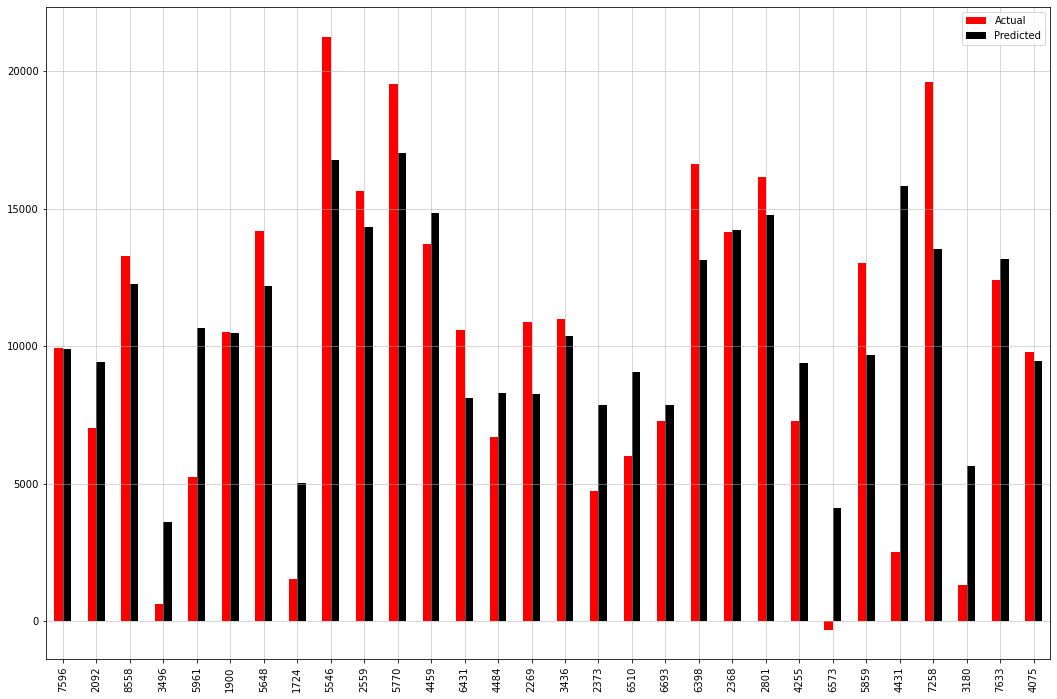

In [87]:
# Make predictions on group4 x_test data using group4 model
pred = forest_model4.predict(x_test4)
# Create DataFrame of predicted and actual values
plot_df = pd.DataFrame({'Actual': y_test4,
                        'Predicted': pred})
# select the first 30 values 
plot_df = plot_df.iloc[:30,:]
plot_df.plot(kind='bar',figsize=(18,12), color = ['red', 'black'])
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Random Forest regressor is an Ensemble regression model that uses a large number of decorellated trees to make decisions at each decision node to make a split before arriving at an answer. The Random Forest model starts its training by sampling the trainin data n time by n observations with replacement, this sampling method is also know as boothstrapping.
After the boothstrapping process a decision tree is grown for each sampled data, (a decision tree is simply a kind of tree like decision making process made using a method called recursive binary splitting where two paths are available to follow such that path A is chosen if condition A is met else Path B is followed) at the decision node where the split occurs, in a Random forest we are only allowed to arrive at a decison using only m features from all p predictors in the train data, where m < sqareroot(p), i.e in the case of model where we used 30 features to train,a split at each decision node is made using only 5 features, and this helps to decorrelate each tree that we grow and this in effect reduces the variance of our model. This tree is grown over and over again until a certain condition is met where we do not have enough observations in our train data to make a split, this condition is known as the minimum_sample_split

In [ ]:
# discuss chosen methods logic

Our method of analysis is simple and straight forward. we weould walk through our thought process starting from the exploration of the data to feature selction, model building and then finally model selection.

Firstly for the EDA part, we noticed that he dataset was made up of 5 distinct states all having their distinct attributes like temperature, pressure, rainfall, etc which all come together to have a relationship with the load shortfall. We then noticed that these states and their attributes can be analyzed as separate entities as well as group with respect to the target variable load_shortfall_3h, so we opted to first separate each state into a variable and then analyze how each feature relates to every other feature in the state eg, how does **Valencia_temp** affect **Valencia_Humidity** in a given hour of the day, do they increase together or does one decrease and one increase?. Then subsequently after understanding the relationship of the feature in a state, we can then analyze how these features interact across the dataset.

For the EDA we performed the following tests:

1. Scatter Plots

2. Histograms

3. Bar Charts

4. KDE plots

5. Variance Threshold tests

6. Test for Correlation

7. Test for Multicollinearity.

These tests were performed to ascertain the fitness of the data to perform predictive modelling and also to determine the best features that would produce the optimal results from a predictive model. the scatter. The scatter plots were made to see the linear relationship between each predictor and the response variable, the Histograms and the KDE plots were made to view the distribution of all numerical variables to know if they follow a normal distribution, the Variance threshold test was carried out to ascertain those features that fall below a certain set threshold value and finally the multicollinearity test is carried out to ascertain those variables that are highly correlated with the other variables, one of these variables should be considered for dropping as multicollinearity is not a good property for a linear model.

For the feature engineering phase, Valencia_wind_degree and seville_pressure were given as categorical variable having 10 and 25 categories,these variables compared to their counterparts from the other states are numerical so we decided to drop them, because using them accurately would reqire us to have knowledge of what each category stands for on a numerical scale, i.e level_5 wind_degree could be 30 degree on some scale. we also considered using dummies for them but this was deemed not appropriate as we already have too many features and creating 35 more might lead us to te curse of dimenionality.

Using the time feature which was given as a string, we first converted it to datetime object, then extracted the Month, Day od week, and Hour from each time stamp to have 3 additional features. The logic behind this is that the weather conditions varies at each time of he day and thus the amount of power generated, we want our model to pick uo from pattern of the total power generated at different time periods of the day. The newly generated time features that were in numerical format are then converted to categorcal features using the to_categorical() method as opposed to the get_dummies() method, this is so that we do not increase our training features any further.

For the feature selection phase, driven by the results obtained from the statistical tests, we divided our dataset into four groups, these groups comprises of several subsets of the full training data, this was done so we can build several models using the various subsets and thus compare each model's performance and chose which model and which features gave the optimum training and prediction on unseen data.

Six different models were built using the 4 different groups of data, i.e we had a total of 6 x 4 models. We perfomed a train test split using the same sampling of training and testing sets on all 24 models. We compared the model's performance on the test sets and finally the best model in terms of training time, computer resources used, evaluation and numer of features used was selected.

## Kaggle Submission Code

In [33]:
# Load Test Data
test_df = pd.read_csv('df_test.csv')
# Drop Unnamed column
test_df.drop(columns =['Unnamed: 0'], inplace=True)

In [34]:
# All numerical columns in the train set was of datatype 'float64', lets do the same for the test data
numerical_columns = [col for col in test_df.columns if test_df[col].dtype != 'O'] #Select only the numerical columns
# Convert all numerical columns to dtype float64
test_df[numerical_columns] = test_df[numerical_columns].astype('float64')

In [35]:
# We have to perform the same transformation we did on the training set
test_df['time'] = pd.to_datetime(test_df['time'], format = '%Y-%m-%d %H:%M:%S')
# store time column as a variable to use in final csv submission
time =  test_df.time.values

In [36]:
test_df['Month'] = test_df['time'].dt.month   # Extract month from the time column
test_df['Day'] = test_df['time'].dt.day       # Extract day from the time column
test_df['Hour'] = test_df['time'].dt.hour     # Extract hour from the time column
# Drop the time column from test data
test_df.drop('time', axis= 1, inplace= True)

In [38]:
time_cols = ['Month', 'Day', 'Hour'] #Select newly created time columns
# Convert time columns to categorical variables
test_df[time_cols] = test_df[time_cols].astype('category')

In [39]:
# Ccheck data type
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Madrid_wind_speed     2920 non-null   float64 
 1   Valencia_wind_speed   2920 non-null   float64 
 2   Bilbao_clouds_all     2920 non-null   float64 
 3   Bilbao_wind_speed     2920 non-null   float64 
 4   Seville_clouds_all    2920 non-null   float64 
 5   Bilbao_wind_deg       2920 non-null   float64 
 6   Barcelona_wind_speed  2920 non-null   float64 
 7   Barcelona_wind_deg    2920 non-null   float64 
 8   Madrid_clouds_all     2920 non-null   float64 
 9   Seville_wind_speed    2920 non-null   float64 
 10  Bilbao_snow_3h        2920 non-null   float64 
 11  Barcelona_pressure    2920 non-null   float64 
 12  Seville_rain_3h       2920 non-null   float64 
 13  Barcelona_rain_3h     2920 non-null   float64 
 14  Valencia_snow_3h      2920 non-null   float64 
 15  Madr

In [42]:
# Store the feature names of X_train4 in a list so we can extract same features from test data
feature_names = list(x_train4.columns)
# Select same fetures used for training random forest model4
test_df = test_df[feature_names]
test_df.shape # Has Shape 30 same as x_train4 data

(2920, 30)

In [48]:
# Make prediction using selected model
y_pred = forest_model4.predict(test_df) # either use the model object or alternatively load the pickled model from disk
                                        # uncomment and run the cell below

In [46]:
# model_name = 'Random_Forest.pkl' # Stored model name on disk
# with open(model_name, 'rb') as file:
#     model = pickle.load(file) # use pickle to load model into variable model
# y_pred = model.predict(test_df)

In [49]:
# Create a DataFrame of the submission file using the y_pred and the time variable stored above
submission = pd.DataFrame(zip(time,y_pred), columns = ['time','load_shortfall_3h'])
submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8125.923333
1,2018-01-01 03:00:00,5072.853333
2,2018-01-01 06:00:00,4315.390000
3,2018-01-01 09:00:00,6853.200000
4,2018-01-01 12:00:00,7706.088333


In [ ]:
# Save the submission as a csv for upload on kaggle
submission.to_csv('Group11_submission.csv', index_label = False, index = False)